In [125]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import folium
import contextily as cx
import shapely
from shapely.geometry import Point
from pathlib import Path
import pyproj
%matplotlib inline

In [3]:
#loading the final dataset
ab=pd.read_excel('noise_dus.xlsx')

In [63]:
#extracting a part of the original dataset
df=ab.sample(1000)

In [64]:
#checking null values
df.isnull().sum()

Index        0
Bezirk       0
DB_TAG       0
DB_NACHT     0
Latitude     0
Longitude    0
dtype: int64

In [65]:
df.head(5)

,Index,Bezirk,DB_TAG,DB_NACHT,Latitude,Longitude
67491,67492,"Siedlerweg 40, DÃ¼sseldorf, Germany",55,46.0,51.222906,6.839695
71209,71210,"TiergartenstraÃŸe 6, DÃ¼sseldorf, Germany",58,49.0,51.240323,6.805948
66951,66952,"Sebastiansweg 32, DÃ¼sseldorf, Germany",50,42.0,51.212268,6.827999
15275,15276,"Brend'amourstraÃŸe 59, DÃ¼sseldorf, Germany",55,47.0,51.228073,6.759979
36258,36259,"Hinter der BÃ¶ck 49, DÃ¼sseldorf, Germany",56,48.0,51.201551,6.73843


In [66]:
#deleting the Index column 
del df['Index']

altering the data types of the columns

In [67]:
df['Bezirk']=df['Bezirk'].astype(str)

In [68]:
df['DB_TAG']=df['DB_TAG'].astype(float)

In [69]:
df['DB_NACHT']=df['DB_NACHT'].astype(float)

In [70]:
#there are empty Lat & Long data stored as string(' '), so replacing them before converting it to float

In [71]:
df.replace(' ', np.nan,inplace=True)

In [72]:
df['Latitude']=df['Latitude'].astype(float)

In [73]:
df['Longitude']=df['Longitude'].astype(float)

In [ ]:
#creating a GeoPandas DataFrame

In [126]:
noise=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude,df.Latitude,crs="EPSG:4386"))
noise.crs={'init':'epsg:4386'}
noise.head()

C:\Users\joe16\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Bezirk,DB_TAG,DB_NACHT,Latitude,Longitude,geometry
67491,"Siedlerweg 40, DÃ¼sseldorf, Germany",55.0,46.0,51.222906,6.839695,POINT (6.83970 51.22291)
71209,"TiergartenstraÃŸe 6, DÃ¼sseldorf, Germany",58.0,49.0,51.240323,6.805948,POINT (6.80595 51.24032)
66951,"Sebastiansweg 32, DÃ¼sseldorf, Germany",50.0,42.0,51.212268,6.827999,POINT (6.82800 51.21227)
15275,"Brend'amourstraÃŸe 59, DÃ¼sseldorf, Germany",55.0,47.0,51.228073,6.759979,POINT (6.75998 51.22807)
36258,"Hinter der BÃ¶ck 49, DÃ¼sseldorf, Germany",56.0,48.0,51.201551,6.738430,POINT (6.73843 51.20155)


#what is epsg?
https://epsg.io/about

In [ ]:
#germany map outline

In [139]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [143]:
germany=world[world.name=='Germany']

<AxesSubplot:>

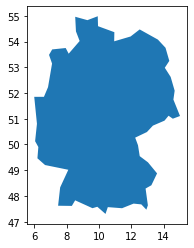

In [144]:
germany.plot()

In [146]:
#used osmnx for dus geometry
#didnt work in this environment
#had to create a new environment to run osmnx
dus_poly = shapely.wkt.loads('POLYGON ((6.68881 51.22949, 6.68886 51.22952, 6.68889 51.22953, 6.68889 51.22953, 6.68890 51.22954, 6.68891 51.22954, 6.68893 51.22957, 6.68897 51.22959, 6.68906 51.22967, 6.68907 51.22967, 6.68908 51.22968, 6.68909 51.22969, 6.68927 51.22983, 6.68942 51.22995, 6.68958 51.22999, 6.68983 51.23016, 6.68989 51.23020, 6.68994 51.23023, 6.68999 51.23027, 6.68999 51.23027, 6.68999 51.23027, 6.69018 51.23040, 6.69036 51.23053, 6.69037 51.23054, 6.69040 51.23055, 6.69043 51.23058, 6.69049 51.23062, 6.69053 51.23065, 6.69057 51.23068, 6.69059 51.23070, 6.69059 51.23070, 6.69060 51.23071, 6.69068 51.23076, 6.69069 51.23077, 6.69071 51.23078, 6.69080 51.23082, 6.69102 51.23094, 6.69125 51.23107, 6.69147 51.23117, 6.69171 51.23131, 6.69183 51.23137, 6.69186 51.23138, 6.69188 51.23139, 6.69190 51.23140, 6.69197 51.23143, 6.69202 51.23145, 6.69204 51.23145, 6.69205 51.23146, 6.69205 51.23146, 6.69221 51.23155, 6.69222 51.23155, 6.69233 51.23162, 6.69243 51.23167, 6.69246 51.23169, 6.69250 51.23171, 6.69251 51.23172, 6.69253 51.23173, 6.69269 51.23181, 6.69271 51.23183, 6.69272 51.23184, 6.69273 51.23184, 6.69276 51.23186, 6.69302 51.23199, 6.69317 51.23207, 6.69329 51.23213, 6.69338 51.23217, 6.69341 51.23218, 6.69343 51.23219, 6.69345 51.23220, 6.69347 51.23221, 6.69353 51.23224, 6.69356 51.23225, 6.69359 51.23227, 6.69394 51.23244, 6.69405 51.23249, 6.69410 51.23252, 6.69463 51.23277, 6.69470 51.23281, 6.69479 51.23286, 6.69503 51.23301, 6.69493 51.23312, 6.69483 51.23323, 6.69545 51.23352, 6.69550 51.23354, 6.69561 51.23360, 6.69576 51.23368, 6.69607 51.23384, 6.69624 51.23388, 6.69633 51.23390, 6.69666 51.23397, 6.69673 51.23399, 6.69711 51.23410, 6.69716 51.23411, 6.69721 51.23413, 6.69732 51.23416, 6.69743 51.23420, 6.69762 51.23427, 6.69765 51.23429, 6.69778 51.23433, 6.69799 51.23441, 6.69799 51.23441, 6.69858 51.23462, 6.69894 51.23497, 6.69899 51.23501, 6.69899 51.23508, 6.70294 51.23624, 6.70291 51.23636, 6.70313 51.23639, 6.70312 51.23643, 6.70321 51.23647, 6.70434 51.23693, 6.70410 51.23722, 6.70585 51.23783, 6.70613 51.23758, 6.70663 51.23780, 6.70819 51.23842, 6.70842 51.23858, 6.70863 51.23873, 6.70907 51.23896, 6.70916 51.23911, 6.71023 51.23968, 6.71050 51.23992, 6.71095 51.24043, 6.71102 51.24077, 6.71126 51.24061, 6.71127 51.24060, 6.71190 51.24122, 6.71335 51.24265, 6.71357 51.24287, 6.71520 51.24385, 6.71656 51.24464, 6.71678 51.24477, 6.71613 51.24522, 6.71615 51.24524, 6.71646 51.24552, 6.71721 51.24606, 6.71785 51.24647, 6.71801 51.24661, 6.71828 51.24685, 6.71846 51.24702, 6.71948 51.24802, 6.72138 51.25006, 6.72139 51.25012, 6.72109 51.25025, 6.72026 51.25050, 6.72056 51.25080, 6.72054 51.25084, 6.72148 51.25163, 6.72200 51.25208, 6.72211 51.25202, 6.72344 51.25319, 6.72460 51.25428, 6.72575 51.25539, 6.72655 51.25660, 6.72614 51.25672, 6.72508 51.25700, 6.72403 51.25733, 6.72365 51.25744, 6.71952 51.25885, 6.71684 51.25976, 6.71568 51.26022, 6.71473 51.26060, 6.71252 51.26155, 6.71085 51.26235, 6.70980 51.26295, 6.70876 51.26359, 6.70801 51.26409, 6.70709 51.26481, 6.70663 51.26517, 6.70605 51.26567, 6.70521 51.26650, 6.70465 51.26710, 6.70398 51.26796, 6.70339 51.26893, 6.70333 51.26902, 6.70315 51.26938, 6.70280 51.27041, 6.70269 51.27072, 6.70259 51.27117, 6.70249 51.27239, 6.70254 51.27315, 6.70255 51.27329, 6.70270 51.27418, 6.70279 51.27450, 6.70296 51.27507, 6.70336 51.27592, 6.70410 51.27723, 6.70453 51.27786, 6.70463 51.27800, 6.70469 51.27809, 6.70477 51.27820, 6.70481 51.27826, 6.70560 51.27926, 6.70682 51.28057, 6.70795 51.28164, 6.71716 51.28954, 6.71757 51.28989, 6.71783 51.29012, 6.72105 51.29288, 6.72263 51.29422, 6.72545 51.29666, 6.72671 51.29778, 6.72774 51.29880, 6.72884 51.30001, 6.72979 51.30112, 6.73090 51.30263, 6.73185 51.30419, 6.73248 51.30540, 6.73284 51.30620, 6.73386 51.30909, 6.73458 51.31258, 6.73475 51.31394, 6.73475 51.31529, 6.73454 51.31701, 6.73403 51.31862, 6.73330 51.32024, 6.73233 51.32177, 6.73155 51.32285, 6.73014 51.32435, 6.72720 51.32661, 6.72445 51.32829, 6.72168 51.32980, 6.71761 51.33187, 6.71449 51.33338, 6.71605 51.33437, 6.71711 51.33588, 6.71783 51.33554, 6.71838 51.33527, 6.71867 51.33512, 6.71876 51.33515, 6.71910 51.33560, 6.71969 51.33618, 6.72005 51.33654, 6.72152 51.33768, 6.72157 51.33768, 6.72166 51.33771, 6.72167 51.33778, 6.72435 51.34028, 6.72506 51.34071, 6.72620 51.34123, 6.72778 51.34189, 6.72946 51.34230, 6.72952 51.34228, 6.72958 51.34231, 6.72960 51.34234, 6.73326 51.34363, 6.73651 51.34477, 6.73663 51.34481, 6.73826 51.34539, 6.73837 51.34586, 6.73834 51.34587, 6.73937 51.34710, 6.74160 51.34871, 6.74223 51.34889, 6.74380 51.35059, 6.74399 51.35066, 6.74401 51.35068, 6.74409 51.35091, 6.74417 51.35096, 6.74428 51.35103, 6.74428 51.35100, 6.74528 51.35158, 6.74551 51.35171, 6.74562 51.35177, 6.74596 51.35199, 6.74654 51.35210, 6.74697 51.35221, 6.74729 51.35240, 6.74788 51.35248, 6.74802 51.35249, 6.74823 51.35248, 6.74838 51.35247, 6.74855 51.35244, 6.74871 51.35239, 6.74885 51.35233, 6.74918 51.35215, 6.75276 51.35003, 6.75285 51.34997, 6.75293 51.34990, 6.75302 51.34981, 6.75307 51.34974, 6.75313 51.34962, 6.75316 51.34954, 6.75317 51.34943, 6.75317 51.34933, 6.75314 51.34900, 6.75330 51.34905, 6.75338 51.34915, 6.75350 51.34923, 6.75372 51.34944, 6.75433 51.34994, 6.75453 51.35000, 6.75462 51.35001, 6.75481 51.34996, 6.75541 51.34970, 6.75565 51.34961, 6.75620 51.34944, 6.75669 51.34929, 6.75726 51.34911, 6.75794 51.34888, 6.75845 51.34870, 6.75873 51.34861, 6.75954 51.34837, 6.75986 51.34827, 6.76001 51.34824, 6.76015 51.34822, 6.76040 51.34819, 6.76089 51.34811, 6.76210 51.34815, 6.76227 51.34819, 6.76229 51.34814, 6.76251 51.34808, 6.76292 51.34799, 6.76375 51.34775, 6.76406 51.34768, 6.76459 51.34757, 6.76482 51.34755, 6.76562 51.34753, 6.76607 51.34747, 6.76688 51.34731, 6.76948 51.34666, 6.77058 51.34634, 6.77160 51.34603, 6.77221 51.34582, 6.77263 51.34569, 6.77314 51.34543, 6.77395 51.34500, 6.77427 51.34485, 6.77505 51.34438, 6.77527 51.34426, 6.77581 51.34403, 6.77602 51.34393, 6.77615 51.34384, 6.77631 51.34374, 6.77640 51.34372, 6.77646 51.34365, 6.77768 51.34342, 6.77933 51.34310, 6.78025 51.34286, 6.78062 51.34277, 6.78124 51.34261, 6.78136 51.34258, 6.78145 51.34256, 6.78150 51.34255, 6.78269 51.34269, 6.78243 51.34313, 6.78225 51.34386, 6.78266 51.34399, 6.78341 51.34416, 6.78579 51.34490, 6.78612 51.34515, 6.78742 51.34447, 6.78728 51.34429, 6.78947 51.34365, 6.78928 51.34353, 6.78957 51.34339, 6.78960 51.34338, 6.78967 51.34350, 6.78976 51.34363, 6.79139 51.34333, 6.79181 51.34326, 6.79187 51.34358, 6.79181 51.34382, 6.79223 51.34380, 6.79228 51.34382, 6.79247 51.34387, 6.79249 51.34390, 6.79254 51.34391, 6.79259 51.34402, 6.79261 51.34413, 6.79274 51.34424, 6.79287 51.34428, 6.79282 51.34446, 6.79274 51.34461, 6.79267 51.34470, 6.79216 51.34501, 6.79077 51.34503, 6.79106 51.34521, 6.79190 51.34660, 6.79169 51.34665, 6.79177 51.34679, 6.79196 51.34724, 6.79204 51.34752, 6.79204 51.34765, 6.79209 51.34768, 6.79217 51.34771, 6.79231 51.34772, 6.79245 51.34773, 6.79300 51.34774, 6.79340 51.34773, 6.79365 51.34771, 6.79381 51.34773, 6.79396 51.34767, 6.79409 51.34784, 6.79432 51.34886, 6.79437 51.34962, 6.79432 51.35008, 6.79424 51.35029, 6.79412 51.35049, 6.79399 51.35091, 6.79390 51.35157, 6.79382 51.35222, 6.80587 51.35041, 6.80589 51.35039, 6.80587 51.35039, 6.80549 51.34952, 6.80536 51.34910, 6.80515 51.34829, 6.80493 51.34764, 6.80458 51.34632, 6.80455 51.34619, 6.80450 51.34614, 6.80449 51.34612, 6.80455 51.34608, 6.80459 51.34532, 6.80452 51.34300, 6.80463 51.34299, 6.80483 51.34301, 6.80512 51.34302, 6.80523 51.34304, 6.80532 51.34302, 6.80554 51.34301, 6.80576 51.34302, 6.80598 51.34302, 6.80616 51.34305, 6.80643 51.34303, 6.80647 51.34304, 6.80655 51.34303, 6.80683 51.34303, 6.80719 51.34306, 6.80723 51.34310, 6.80745 51.34308, 6.80773 51.34308, 6.80786 51.34310, 6.80848 51.34310, 6.80871 51.34313, 6.80894 51.34314, 6.80902 51.34315, 6.80915 51.34317, 6.80940 51.34318, 6.80952 51.34292, 6.80943 51.34251, 6.80936 51.34239, 6.80926 51.34221, 6.80921 51.34188, 6.80875 51.34070, 6.80857 51.34051, 6.80875 51.33952, 6.80877 51.33938, 6.80865 51.33863, 6.80913 51.33745, 6.80905 51.33742, 6.80894 51.33728, 6.80887 51.33723, 6.80864 51.33715, 6.80860 51.33713, 6.80838 51.33707, 6.80799 51.33701, 6.80769 51.33702, 6.80739 51.33706, 6.80733 51.33707, 6.80679 51.33710, 6.80617 51.33714, 6.80610 51.33714, 6.80607 51.33714, 6.80604 51.33714, 6.80591 51.33713, 6.80574 51.33712, 6.80559 51.33712, 6.80529 51.33705, 6.80509 51.33703, 6.80491 51.33705, 6.80474 51.33721, 6.80469 51.33717, 6.80464 51.33706, 6.80458 51.33695, 6.80456 51.33690, 6.80449 51.33675, 6.80443 51.33652, 6.80434 51.33633, 6.80419 51.33615, 6.80399 51.33603, 6.80365 51.33577, 6.80338 51.33569, 6.80320 51.33558, 6.80306 51.33547, 6.80309 51.33534, 6.80321 51.33519, 6.80343 51.33511, 6.80358 51.33504, 6.80356 51.33482, 6.80345 51.33455, 6.80341 51.33441, 6.80328 51.33410, 6.80327 51.33393, 6.80334 51.33383, 6.80343 51.33373, 6.80358 51.33350, 6.80363 51.33334, 6.80367 51.33284, 6.80376 51.33238, 6.80384 51.33222, 6.80393 51.33211, 6.80403 51.33193, 6.80429 51.33163, 6.80434 51.33152, 6.80439 51.33149, 6.80260 51.33054, 6.80274 51.32963, 6.80260 51.32843, 6.80611 51.32650, 6.80674 51.32615, 6.80735 51.32324, 6.80872 51.32263, 6.81028 51.32194, 6.81027 51.32192, 6.81517 51.32098, 6.81746 51.32094, 6.81606 51.31847, 6.81412 51.31514, 6.81398 51.31507, 6.80968 51.31397, 6.80975 51.31390, 6.81144 51.31114, 6.81105 51.31064, 6.81076 51.31012, 6.80998 51.30865, 6.80975 51.30811, 6.80971 51.30801, 6.80952 51.30766, 6.80941 51.30757, 6.80930 51.30757, 6.80911 51.30757, 6.80897 51.30754, 6.80881 51.30744, 6.80867 51.30741, 6.80788 51.30741, 6.80693 51.30744, 6.80622 51.30747, 6.80515 51.30748, 6.80502 51.30748, 6.80440 51.30722, 6.80353 51.30690, 6.80354 51.30667, 6.80354 51.30656, 6.80353 51.30648, 6.80345 51.30631, 6.80341 51.30571, 6.80343 51.30526, 6.80337 51.30507, 6.80337 51.30494, 6.80335 51.30482, 6.80124 51.30100, 6.80144 51.30094, 6.80235 51.30066, 6.80463 51.30005, 6.80477 51.29997, 6.80581 51.29991, 6.80600 51.29965, 6.80695 51.29958, 6.80667 51.29865, 6.80657 51.29830, 6.80586 51.29680, 6.80477 51.29455, 6.80446 51.29389, 6.80408 51.29311, 6.80364 51.29163, 6.80352 51.29098, 6.80319 51.29095, 6.80315 51.29055, 6.80314 51.29017, 6.80354 51.29010, 6.80352 51.28909, 6.80360 51.28858, 6.80362 51.28835, 6.80370 51.28715, 6.80387 51.28706, 6.80380 51.28666, 6.80387 51.28628, 6.80390 51.28579, 6.80392 51.28527, 6.80404 51.28280, 6.80401 51.28236, 6.80391 51.28177, 6.80376 51.28119, 6.80347 51.28078, 6.80343 51.28072, 6.80332 51.28057, 6.80269 51.27978, 6.80294 51.27967, 6.80323 51.27955, 6.80379 51.27932, 6.80366 51.27915, 6.80616 51.27912, 6.80635 51.27912, 6.80724 51.27915, 6.80763 51.27919, 6.80809 51.27927, 6.80846 51.27937, 6.80874 51.27948, 6.80896 51.27949, 6.80911 51.27943, 6.80950 51.27959, 6.80972 51.27969, 6.80988 51.27953, 6.81030 51.27919, 6.81047 51.27906, 6.81054 51.27901, 6.81147 51.27832, 6.81257 51.27753, 6.81391 51.27678, 6.81530 51.27607, 6.81633 51.27558, 6.81728 51.27522, 6.81858 51.27486, 6.81884 51.27478, 6.82099 51.27440, 6.82165 51.27431, 6.82338 51.27413, 6.82511 51.27396, 6.82516 51.27403, 6.82699 51.27704, 6.82744 51.27777, 6.82749 51.27785, 6.82833 51.27921, 6.82843 51.27936, 6.82864 51.27963, 6.82890 51.27987, 6.82900 51.27995, 6.82976 51.28031, 6.83069 51.28058, 6.83146 51.28027, 6.83199 51.28006, 6.83227 51.27995, 6.83134 51.27852, 6.83192 51.27848, 6.83274 51.27802, 6.83286 51.27795, 6.83299 51.27787, 6.83391 51.27735, 6.83425 51.27716, 6.83444 51.27695, 6.83462 51.27696, 6.83487 51.27706, 6.83544 51.27728, 6.83573 51.27738, 6.83579 51.27736, 6.83592 51.27721, 6.83598 51.27708, 6.83599 51.27696, 6.83641 51.27697, 6.83653 51.27697, 6.83652 51.27637, 6.83901 51.27634, 6.84018 51.27682, 6.84124 51.27643, 6.84423 51.27713, 6.84586 51.27749, 6.84706 51.27781, 6.85059 51.27844, 6.85091 51.27854, 6.85121 51.27814, 6.85111 51.27804, 6.85107 51.27782, 6.85073 51.27669, 6.85126 51.27666, 6.85136 51.27664, 6.85143 51.27660, 6.85146 51.27656, 6.85148 51.27649, 6.85139 51.27615, 6.85145 51.27610, 6.85168 51.27605, 6.85325 51.27565, 6.85354 51.27561, 6.85432 51.27558, 6.85494 51.27549, 6.85635 51.27521, 6.85665 51.27510, 6.85746 51.27473, 6.85791 51.27449, 6.85808 51.27437, 6.85825 51.27428, 6.85833 51.27426, 6.85848 51.27423, 6.85863 51.27423, 6.85914 51.27428, 6.85971 51.27436, 6.85994 51.27431, 6.86020 51.27421, 6.86059 51.27402, 6.86117 51.27374, 6.86152 51.27364, 6.86237 51.27355, 6.86267 51.27354, 6.86312 51.27345, 6.86452 51.27287, 6.86609 51.27236, 6.86635 51.27229, 6.86657 51.27223, 6.86686 51.27226, 6.86688 51.27224, 6.86785 51.27292, 6.86807 51.27306, 6.86865 51.27354, 6.86879 51.27361, 6.86928 51.27389, 6.86956 51.27369, 6.86982 51.27343, 6.87008 51.27312, 6.87012 51.27281, 6.87026 51.27249, 6.87035 51.27223, 6.87053 51.27195, 6.87061 51.27173, 6.87115 51.27165, 6.87136 51.27155, 6.87149 51.27159, 6.87159 51.27160, 6.87200 51.27183, 6.87252 51.27218, 6.87235 51.27282, 6.87465 51.27367, 6.87469 51.27365, 6.87482 51.27372, 6.87486 51.27380, 6.87486 51.27402, 6.87490 51.27415, 6.87496 51.27424, 6.87511 51.27435, 6.87534 51.27447, 6.87574 51.27470, 6.87577 51.27454, 6.87585 51.27426, 6.87585 51.27403, 6.87588 51.27381, 6.87591 51.27360, 6.87588 51.27341, 6.87590 51.27282, 6.87585 51.27191, 6.87576 51.27124, 6.87462 51.27088, 6.87454 51.27024, 6.87453 51.27003, 6.87454 51.26989, 6.87458 51.26984, 6.87483 51.26958, 6.87515 51.26931, 6.87580 51.26876, 6.87609 51.26803, 6.87612 51.26800, 6.87719 51.26818, 6.87971 51.26868, 6.87993 51.26873, 6.88183 51.26916, 6.88184 51.26915, 6.88201 51.26889, 6.88215 51.26851, 6.88234 51.26832, 6.88247 51.26833, 6.88381 51.26857, 6.88515 51.26883, 6.88562 51.26883, 6.88624 51.26898, 6.88853 51.26920, 6.88854 51.26918, 6.88914 51.26937, 6.88976 51.26894, 6.88963 51.26874, 6.88969 51.26860, 6.88977 51.26822, 6.88975 51.26810, 6.88977 51.26802, 6.88968 51.26787, 6.88991 51.26751, 6.89083 51.26673, 6.89162 51.26625, 6.89172 51.26617, 6.89205 51.26671, 6.89301 51.26629, 6.89437 51.26574, 6.89407 51.26530, 6.89383 51.26497, 6.89439 51.26483, 6.89459 51.26477, 6.89481 51.26473, 6.89520 51.26473, 6.89575 51.26461, 6.89598 51.26453, 6.89621 51.26494, 6.89644 51.26512, 6.89700 51.26504, 6.89693 51.26477, 6.89712 51.26474, 6.89725 51.26474, 6.89753 51.26476, 6.89753 51.26470, 6.89774 51.26474, 6.89811 51.26479, 6.89953 51.26495, 6.89954 51.26496, 6.90051 51.26493, 6.90179 51.26497, 6.90368 51.26494, 6.90643 51.26755, 6.90676 51.26748, 6.90692 51.26746, 6.90728 51.26739, 6.90760 51.26736, 6.90781 51.26753, 6.90788 51.26767, 6.90804 51.26863, 6.90800 51.26914, 6.90802 51.26966, 6.90798 51.26992, 6.90812 51.27017, 6.90816 51.27021, 6.90836 51.27034, 6.90840 51.27035, 6.90867 51.27068, 6.90863 51.27086, 6.90853 51.27091, 6.90842 51.27103, 6.90849 51.27108, 6.90882 51.27121, 6.90896 51.27133, 6.90909 51.27136, 6.90997 51.27155, 6.91110 51.27166, 6.91123 51.27133, 6.91141 51.27112, 6.91274 51.27251, 6.91129 51.27318, 6.91135 51.27324, 6.91208 51.27421, 6.91223 51.27457, 6.91226 51.27479, 6.91226 51.27498, 6.91228 51.27530, 6.91238 51.27543, 6.91239 51.27575, 6.91263 51.27602, 6.91278 51.27614, 6.91343 51.27602, 6.91399 51.27600, 6.91441 51.27593, 6.91488 51.27536, 6.91530 51.27519, 6.91554 51.27490, 6.91568 51.27483, 6.91608 51.27480, 6.91656 51.27457, 6.91738 51.27418, 6.91739 51.27348, 6.91732 51.27334, 6.91725 51.27326, 6.91715 51.27321, 6.91651 51.27296, 6.91665 51.27292, 6.91775 51.27269, 6.92252 51.27360, 6.92840 51.27288, 6.93011 51.27320, 6.93081 51.27454, 6.93108 51.27461, 6.93060 51.27534, 6.93437 51.27602, 6.93456 51.27583, 6.93468 51.27570, 6.93477 51.27572, 6.93492 51.27574, 6.93540 51.27599, 6.93582 51.27607, 6.93588 51.27581, 6.93580 51.27560, 6.93594 51.27535, 6.93493 51.27487, 6.93469 51.27430, 6.93496 51.27418, 6.93702 51.27391, 6.93724 51.27388, 6.93734 51.27366, 6.93985 51.27281, 6.93987 51.27272, 6.93988 51.27256, 6.93932 51.27228, 6.93894 51.27152, 6.93855 51.27095, 6.93720 51.26965, 6.93655 51.26977, 6.93573 51.26998, 6.93539 51.26962, 6.93529 51.26950, 6.93416 51.26831, 6.93401 51.26815, 6.93367 51.26782, 6.93282 51.26728, 6.93265 51.26716, 6.93282 51.26705, 6.93243 51.26663, 6.93408 51.26577, 6.93260 51.26429, 6.93101 51.26565, 6.92925 51.26559, 6.92925 51.26572, 6.92767 51.26557, 6.92768 51.26514, 6.92760 51.26490, 6.92778 51.26472, 6.92784 51.26455, 6.92778 51.26441, 6.92833 51.26438, 6.92873 51.26434, 6.92855 51.26408, 6.92847 51.26382, 6.92847 51.26364, 6.92849 51.26348, 6.92859 51.26326, 6.92887 51.26287, 6.92915 51.26250, 6.92881 51.26230, 6.92894 51.26210, 6.92908 51.26190, 6.92925 51.26163, 6.92895 51.26162, 6.93000 51.25739, 6.93032 51.25719, 6.92948 51.25670, 6.92875 51.25628, 6.92808 51.25574, 6.92801 51.25537, 6.92798 51.25522, 6.92845 51.25516, 6.92807 51.25495, 6.92873 51.25472, 6.92824 51.25401, 6.92779 51.25394, 6.92749 51.25435, 6.92687 51.25349, 6.92684 51.25336, 6.92721 51.25305, 6.92819 51.25213, 6.92832 51.25205, 6.92920 51.25204, 6.92928 51.25171, 6.92935 51.25140, 6.93103 51.25022, 6.93163 51.24977, 6.93337 51.24843, 6.93310 51.24819, 6.93318 51.24807, 6.93389 51.24841, 6.93408 51.24843, 6.93251 51.24698, 6.93270 51.24653, 6.93297 51.24588, 6.93283 51.24584, 6.93259 51.24572, 6.93147 51.24452, 6.93167 51.24331, 6.93155 51.24264, 6.93145 51.24250, 6.93191 51.24162, 6.93217 51.24147, 6.93235 51.24123, 6.93239 51.24085, 6.93234 51.24057, 6.93219 51.24028, 6.93194 51.24007, 6.93155 51.23991, 6.93137 51.23977, 6.93123 51.23947, 6.93101 51.23908, 6.93122 51.23803, 6.93049 51.23801, 6.93033 51.23834, 6.93009 51.23895, 6.93003 51.23949, 6.93043 51.24011, 6.93074 51.24060, 6.93088 51.24087, 6.92984 51.24125, 6.92679 51.24242, 6.92671 51.24245, 6.92649 51.24253, 6.92465 51.24197, 6.92332 51.24179, 6.92192 51.24163, 6.92107 51.24166, 6.92087 51.24163, 6.92004 51.24114, 6.91963 51.24075, 6.91816 51.24003, 6.91802 51.24003, 6.91749 51.24041, 6.91745 51.24047, 6.91717 51.24058, 6.91686 51.24072, 6.91707 51.24110, 6.91703 51.24110, 6.91671 51.24108, 6.91650 51.24106, 6.91637 51.24105, 6.91617 51.24103, 6.91603 51.24102, 6.91585 51.24099, 6.91526 51.24094, 6.91512 51.24095, 6.91505 51.24095, 6.91499 51.24096, 6.91488 51.24098, 6.91467 51.24102, 6.91456 51.24104, 6.91441 51.24106, 6.91423 51.24108, 6.91346 51.24114, 6.91311 51.24117, 6.91285 51.24120, 6.91273 51.24121, 6.91266 51.24123, 6.91260 51.24124, 6.91250 51.24127, 6.91125 51.24173, 6.91083 51.24177, 6.91041 51.24179, 6.91022 51.24177, 6.91012 51.24124, 6.90984 51.24087, 6.90959 51.24052, 6.90900 51.23974, 6.90874 51.23939, 6.90840 51.23896, 6.90737 51.23925, 6.90704 51.23935, 6.90680 51.23942, 6.90657 51.23950, 6.90635 51.23958, 6.90613 51.23967, 6.90507 51.24007, 6.90422 51.24035, 6.90385 51.24042, 6.90362 51.24041, 6.90303 51.24023, 6.90291 51.23998, 6.90336 51.23988, 6.90383 51.23978, 6.90402 51.23960, 6.90403 51.23904, 6.90404 51.23891, 6.90396 51.23857, 6.90387 51.23823, 6.90354 51.23833, 6.90329 51.23836, 6.90305 51.23832, 6.90253 51.23824, 6.90264 51.23806, 6.90289 51.23770, 6.90313 51.23743, 6.90322 51.23713, 6.90299 51.23711, 6.90277 51.23710, 6.90273 51.23710, 6.90262 51.23720, 6.90219 51.23715, 6.90167 51.23709, 6.90140 51.23705, 6.90119 51.23707, 6.90029 51.23711, 6.89914 51.23717, 6.89807 51.23738, 6.89699 51.23763, 6.89713 51.23787, 6.89725 51.23815, 6.89700 51.23829, 6.89655 51.23857, 6.89574 51.23885, 6.89552 51.23882, 6.89489 51.23881, 6.89456 51.23893, 6.89420 51.23893, 6.89395 51.23897, 6.89383 51.23897, 6.89361 51.23904, 6.89347 51.23911, 6.89346 51.23872, 6.89328 51.23866, 6.89262 51.23860, 6.89322 51.23745, 6.89277 51.23740, 6.89250 51.23744, 6.89156 51.23765, 6.89097 51.23752, 6.89039 51.23825, 6.89047 51.23929, 6.89030 51.23925, 6.89017 51.23923, 6.88976 51.23918, 6.88896 51.23906, 6.88824 51.23896, 6.88815 51.23918, 6.88792 51.23930, 6.88785 51.23945, 6.88782 51.23951, 6.88770 51.23966, 6.88753 51.23971, 6.88739 51.23969, 6.88719 51.23954, 6.88704 51.23942, 6.88669 51.23933, 6.88648 51.23929, 6.88631 51.23918, 6.88603 51.23912, 6.88573 51.23900, 6.88527 51.23881, 6.88468 51.23883, 6.88372 51.23856, 6.88320 51.23834, 6.88302 51.23827, 6.88276 51.23826, 6.88278 51.23846, 6.88310 51.23904, 6.88392 51.23923, 6.88396 51.23955, 6.88391 51.24010, 6.88359 51.24071, 6.88318 51.24073, 6.88279 51.24079, 6.88284 51.24099, 6.88305 51.24119, 6.88324 51.24134, 6.88330 51.24155, 6.88317 51.24179, 6.88299 51.24190, 6.88261 51.24205, 6.88236 51.24212, 6.88181 51.24220, 6.88104 51.24216, 6.87834 51.24251, 6.87757 51.24223, 6.87805 51.24231, 6.87805 51.24222, 6.87659 51.24169, 6.87602 51.24140, 6.87548 51.24138, 6.87443 51.24120, 6.87419 51.24106, 6.87400 51.24083, 6.87384 51.24070, 6.87356 51.24061, 6.87340 51.24061, 6.87331 51.24122, 6.87206 51.24153, 6.87195 51.24170, 6.87107 51.24146, 6.87123 51.24089, 6.87139 51.24033, 6.87145 51.24006, 6.87151 51.23979, 6.87164 51.23914, 6.87243 51.23832, 6.87253 51.23814, 6.87260 51.23744, 6.87264 51.23726, 6.87267 51.23709, 6.87268 51.23697, 6.87268 51.23685, 6.87268 51.23663, 6.87268 51.23645, 6.87269 51.23601, 6.87268 51.23563, 6.87267 51.23548, 6.87268 51.23361, 6.87269 51.23310, 6.87291 51.23274, 6.87314 51.23249, 6.87319 51.23235, 6.87486 51.23229, 6.87697 51.23218, 6.87697 51.23159, 6.87710 51.23150, 6.87713 51.23119, 6.87647 51.23069, 6.87620 51.23064, 6.87579 51.23024, 6.87709 51.22959, 6.87780 51.22924, 6.87789 51.22920, 6.87884 51.22874, 6.87982 51.22826, 6.87972 51.22820, 6.88006 51.22803, 6.87908 51.22766, 6.87839 51.22740, 6.87789 51.22714, 6.87744 51.22691, 6.87663 51.22657, 6.87566 51.22618, 6.87537 51.22607, 6.87576 51.22553, 6.87552 51.22546, 6.87488 51.22520, 6.87461 51.22506, 6.87420 51.22471, 6.87404 51.22451, 6.87383 51.22434, 6.87372 51.22429, 6.87362 51.22425, 6.87330 51.22420, 6.87302 51.22393, 6.87292 51.22380, 6.87243 51.22328, 6.87189 51.22263, 6.87264 51.22257, 6.87335 51.22210, 6.87328 51.22200, 6.87323 51.22189, 6.87324 51.22178, 6.87325 51.22173, 6.87331 51.22168, 6.87345 51.22161, 6.87375 51.22151, 6.87380 51.22148, 6.87384 51.22144, 6.87385 51.22137, 6.87380 51.22126, 6.87381 51.22116, 6.87385 51.22101, 6.87386 51.22088, 6.87383 51.22077, 6.87376 51.22069, 6.87369 51.22063, 6.87368 51.22055, 6.87369 51.22044, 6.87362 51.22031, 6.87324 51.22016, 6.87313 51.21998, 6.87333 51.21998, 6.87422 51.21901, 6.87453 51.21869, 6.87483 51.21838, 6.87484 51.21837, 6.87486 51.21835, 6.87526 51.21792, 6.87554 51.21762, 6.87610 51.21703, 6.87649 51.21662, 6.87688 51.21620, 6.87721 51.21586, 6.87725 51.21582, 6.87769 51.21585, 6.87780 51.21573, 6.87792 51.21561, 6.87804 51.21554, 6.87831 51.21533, 6.87792 51.21508, 6.87869 51.21469, 6.87864 51.21420, 6.87863 51.21414, 6.87863 51.21411, 6.87864 51.21409, 6.87865 51.21407, 6.87867 51.21406, 6.87870 51.21404, 6.87872 51.21404, 6.87876 51.21403, 6.87914 51.21403, 6.87953 51.21403, 6.87956 51.21404, 6.87959 51.21404, 6.87962 51.21405, 6.87965 51.21407, 6.87968 51.21410, 6.87981 51.21423, 6.88028 51.21422, 6.88093 51.21426, 6.88101 51.21457, 6.88082 51.21493, 6.88095 51.21546, 6.88100 51.21568, 6.88118 51.21569, 6.88169 51.21494, 6.88209 51.21451, 6.88242 51.21456, 6.88278 51.21454, 6.88300 51.21443, 6.88339 51.21438, 6.88425 51.21423, 6.88469 51.21404, 6.88510 51.21375, 6.88542 51.21340, 6.88566 51.21350, 6.88601 51.21366, 6.88626 51.21376, 6.88653 51.21387, 6.88662 51.21390, 6.88776 51.21397, 6.88803 51.21399, 6.88819 51.21400, 6.88836 51.21402, 6.88892 51.21408, 6.88909 51.21410, 6.88921 51.21411, 6.88936 51.21410, 6.88948 51.21408, 6.88959 51.21405, 6.88980 51.21397, 6.88999 51.21390, 6.89011 51.21387, 6.89074 51.21262, 6.89076 51.21255, 6.89098 51.21256, 6.89100 51.21256, 6.89379 51.21267, 6.89440 51.21296, 6.89491 51.21320, 6.89544 51.21317, 6.89587 51.21314, 6.89626 51.21312, 6.89646 51.21312, 6.89711 51.21311, 6.89735 51.21310, 6.89748 51.21309, 6.89758 51.21307, 6.89840 51.21295, 6.89897 51.21286, 6.89926 51.21283, 6.89964 51.21276, 6.89922 51.21264, 6.89914 51.21262, 6.89915 51.21222, 6.89954 51.21209, 6.89993 51.21195, 6.90029 51.21182, 6.90086 51.21162, 6.90115 51.21142, 6.90147 51.21135, 6.90177 51.21126, 6.90218 51.21113, 6.90296 51.21097, 6.90282 51.21127, 6.90338 51.21119, 6.90356 51.21126, 6.90375 51.21134, 6.90388 51.21136, 6.90407 51.21139, 6.90416 51.21139, 6.90433 51.21139, 6.90546 51.21140, 6.90561 51.21150, 6.90576 51.21160, 6.90590 51.21164, 6.90611 51.21171, 6.90635 51.21176, 6.90642 51.21178, 6.90717 51.21130, 6.90695 51.21107, 6.90675 51.21081, 6.90676 51.21077, 6.90688 51.21073, 6.90728 51.21076, 6.90853 51.21157, 6.90876 51.21164, 6.90955 51.21144, 6.90970 51.21143, 6.90981 51.21143, 6.91011 51.21139, 6.91060 51.21139, 6.91043 51.21093, 6.91181 51.21076, 6.91167 51.21040, 6.91159 51.21019, 6.91093 51.20895, 6.91106 51.20892, 6.91099 51.20881, 6.91038 51.20797, 6.91027 51.20782, 6.91005 51.20753, 6.90996 51.20749, 6.90930 51.20670, 6.90881 51.20618, 6.90809 51.20554, 6.90646 51.20408, 6.90605 51.20368, 6.90576 51.20330, 6.90557 51.20302, 6.90549 51.20289, 6.90543 51.20276, 6.90538 51.20259, 6.90538 51.20250, 6.90534 51.20233, 6.90522 51.20180, 6.90519 51.20168, 6.90517 51.20160, 6.90514 51.20151, 6.90518 51.20135, 6.90524 51.20123, 6.90534 51.20118, 6.90570 51.20109, 6.90576 51.20107, 6.90589 51.20102, 6.90601 51.20097, 6.90611 51.20092, 6.90620 51.20088, 6.90625 51.20085, 6.90631 51.20081, 6.90635 51.20077, 6.90639 51.20072, 6.90644 51.20066, 6.90649 51.20058, 6.90652 51.20051, 6.90654 51.20045, 6.90655 51.20037, 6.90655 51.20009, 6.90648 51.19970, 6.90650 51.19942, 6.90656 51.19927, 6.90671 51.19884, 6.90674 51.19877, 6.90679 51.19864, 6.90698 51.19845, 6.90803 51.19775, 6.90843 51.19744, 6.90890 51.19709, 6.90920 51.19684, 6.90926 51.19679, 6.90932 51.19673, 6.90933 51.19672, 6.90935 51.19670, 6.90938 51.19666, 6.90943 51.19661, 6.90946 51.19657, 6.90949 51.19652, 6.90951 51.19648, 6.90954 51.19643, 6.90956 51.19639, 6.90957 51.19635, 6.90961 51.19623, 6.90962 51.19617, 6.90963 51.19609, 6.90965 51.19600, 6.90966 51.19593, 6.90966 51.19586, 6.90965 51.19579, 6.90963 51.19573, 6.90960 51.19563, 6.90958 51.19561, 6.90955 51.19559, 6.90953 51.19558, 6.90951 51.19557, 6.90950 51.19557, 6.90948 51.19557, 6.90941 51.19556, 6.90976 51.19543, 6.91019 51.19528, 6.91082 51.19502, 6.91209 51.19449, 6.91224 51.19439, 6.91346 51.19380, 6.91357 51.19381, 6.91407 51.19352, 6.91462 51.19321, 6.91471 51.19316, 6.91481 51.19312, 6.91491 51.19315, 6.91536 51.19334, 6.91571 51.19349, 6.91676 51.19358, 6.91690 51.19359, 6.91715 51.19360, 6.91747 51.19349, 6.91758 51.19345, 6.91787 51.19330, 6.91814 51.19316, 6.91828 51.19309, 6.91835 51.19305, 6.91842 51.19302, 6.91861 51.19294, 6.91878 51.19289, 6.91891 51.19285, 6.91902 51.19283, 6.91910 51.19281, 6.91919 51.19280, 6.91929 51.19278, 6.91940 51.19277, 6.91948 51.19276, 6.91956 51.19275, 6.91966 51.19275, 6.91979 51.19275, 6.91989 51.19275, 6.92006 51.19276, 6.92127 51.19282, 6.92131 51.19266, 6.92034 51.19259, 6.91975 51.19255, 6.91800 51.19244, 6.91796 51.19247, 6.91792 51.19250, 6.91789 51.19252, 6.91764 51.19252, 6.91730 51.19246, 6.91729 51.19246, 6.91714 51.19243, 6.91724 51.19219, 6.91711 51.19219, 6.91667 51.19216, 6.91619 51.19214, 6.91561 51.19211, 6.91574 51.19204, 6.91581 51.19193, 6.91591 51.19200, 6.91616 51.19185, 6.91634 51.19174, 6.91657 51.19159, 6.91684 51.19143, 6.91668 51.19133, 6.91690 51.19119, 6.91717 51.19102, 6.91731 51.19094, 6.91734 51.19092, 6.91740 51.19089, 6.91750 51.19083, 6.91769 51.19074, 6.91801 51.19057, 6.91841 51.19035, 6.91910 51.18996, 6.91972 51.18959, 6.92033 51.18923, 6.92023 51.18919, 6.92053 51.18896, 6.91650 51.18739, 6.91598 51.18736, 6.91553 51.18734, 6.91463 51.18730, 6.91448 51.18760, 6.91438 51.18782, 6.91417 51.18825, 6.91372 51.18823, 6.91338 51.18822, 6.91305 51.18821, 6.91294 51.18817, 6.91220 51.18796, 6.91145 51.18774, 6.91062 51.18751, 6.91027 51.18742, 6.91034 51.18734, 6.91041 51.18731, 6.91028 51.18725, 6.91028 51.18719, 6.91034 51.18716, 6.91046 51.18627, 6.91058 51.18542, 6.91062 51.18513, 6.91065 51.18491, 6.91071 51.18453, 6.91081 51.18377, 6.91103 51.18343, 6.91124 51.18310, 6.91141 51.18284, 6.91158 51.18257, 6.91192 51.18204, 6.91207 51.18180, 6.91220 51.18159, 6.91257 51.18101, 6.91252 51.18098, 6.91254 51.18093, 6.91258 51.18087, 6.91273 51.18092, 6.91275 51.18089, 6.91333 51.18100, 6.91361 51.18103, 6.91404 51.18111, 6.91407 51.18111, 6.91410 51.18111, 6.91413 51.18111, 6.91415 51.18110, 6.91418 51.18110, 6.91421 51.18108, 6.91423 51.18107, 6.91424 51.18105, 6.91425 51.18103, 6.91436 51.18027, 6.91448 51.17950, 6.91457 51.17874, 6.91415 51.17867, 6.91321 51.17852, 6.91207 51.17833, 6.91136 51.17822, 6.91064 51.17810, 6.90977 51.17795, 6.90914 51.17787, 6.90762 51.17766, 6.90734 51.17763, 6.90631 51.17746, 6.90486 51.17723, 6.90578 51.17670, 6.90514 51.17655, 6.90476 51.17646, 6.90465 51.17643, 6.90417 51.17669, 6.90404 51.17659, 6.90386 51.17646, 6.90378 51.17641, 6.90371 51.17636, 6.90352 51.17625, 6.90320 51.17614, 6.90307 51.17610, 6.90280 51.17597, 6.90270 51.17592, 6.90220 51.17573, 6.90197 51.17559, 6.90163 51.17537, 6.90132 51.17517, 6.90098 51.17500, 6.90066 51.17485, 6.90015 51.17469, 6.89994 51.17462, 6.89946 51.17448, 6.89925 51.17441, 6.89826 51.17421, 6.89730 51.17400, 6.89641 51.17382, 6.89557 51.17366, 6.89542 51.17365, 6.89543 51.17359, 6.89549 51.17348, 6.89564 51.17342, 6.89574 51.17338, 6.89583 51.17335, 6.89590 51.17333, 6.89595 51.17332, 6.89602 51.17331, 6.89610 51.17329, 6.89618 51.17327, 6.89641 51.17321, 6.89881 51.17248, 6.89896 51.17192, 6.89917 51.17109, 6.89967 51.16916, 6.89992 51.16822, 6.90003 51.16781, 6.90020 51.16715, 6.89848 51.16700, 6.89784 51.16602, 6.89779 51.16593, 6.89774 51.16583, 6.89731 51.16517, 6.89689 51.16453, 6.89698 51.16450, 6.89763 51.16411, 6.89822 51.16389, 6.89820 51.16113, 6.89821 51.16103, 6.89821 51.16098, 6.89828 51.16098, 6.89825 51.15873, 6.89819 51.15870, 6.89818 51.15868, 6.89819 51.15861, 6.89817 51.15857, 6.89814 51.15852, 6.89809 51.15847, 6.89803 51.15842, 6.89797 51.15838, 6.89775 51.15834, 6.89764 51.15835, 6.89757 51.15836, 6.89731 51.15846, 6.89726 51.15846, 6.89723 51.15845, 6.89719 51.15844, 6.89717 51.15842, 6.89710 51.15837, 6.89681 51.15824, 6.89670 51.15822, 6.89662 51.15821, 6.89642 51.15827, 6.89638 51.15835, 6.89633 51.15835, 6.89620 51.15836, 6.89615 51.15837, 6.89607 51.15844, 6.89602 51.15846, 6.89598 51.15847, 6.89583 51.15846, 6.89575 51.15847, 6.89569 51.15850, 6.89566 51.15851, 6.89563 51.15853, 6.89556 51.15858, 6.89549 51.15859, 6.89531 51.15858, 6.89526 51.15859, 6.89520 51.15860, 6.89513 51.15863, 6.89508 51.15865, 6.89504 51.15867, 6.89500 51.15869, 6.89496 51.15872, 6.89490 51.15877, 6.89488 51.15878, 6.89486 51.15879, 6.89483 51.15879, 6.89475 51.15879, 6.89460 51.15879, 6.89445 51.15883, 6.89440 51.15885, 6.89437 51.15886, 6.89425 51.15888, 6.89418 51.15888, 6.89412 51.15889, 6.89407 51.15890, 6.89401 51.15893, 6.89396 51.15896, 6.89390 51.15899, 6.89376 51.15902, 6.89370 51.15905, 6.89368 51.15909, 6.89349 51.15907, 6.89327 51.15910, 6.89307 51.15910, 6.89291 51.15915, 6.89269 51.15928, 6.89235 51.15925, 6.89210 51.15927, 6.89182 51.15932, 6.89167 51.15938, 6.89167 51.15935, 6.89158 51.15934, 6.89150 51.15933, 6.89140 51.15937, 6.89133 51.15942, 6.89132 51.15942, 6.89127 51.15935, 6.89124 51.15931, 6.89103 51.15911, 6.89076 51.15893, 6.89084 51.15883, 6.89106 51.15868, 6.89125 51.15866, 6.89124 51.15849, 6.89125 51.15833, 6.89126 51.15781, 6.89134 51.15739, 6.89145 51.15731, 6.89215 51.15696, 6.89281 51.15664, 6.89278 51.15663, 6.89319 51.15633, 6.89337 51.15615, 6.89373 51.15564, 6.89386 51.15547, 6.89407 51.15506, 6.89439 51.15481, 6.89454 51.15471, 6.89501 51.15445, 6.89521 51.15429, 6.89535 51.15416, 6.89576 51.15388, 6.89593 51.15383, 6.89633 51.15361, 6.89652 51.15346, 6.89688 51.15322, 6.89705 51.15308, 6.89734 51.15296, 6.89785 51.15269, 6.89812 51.15253, 6.89850 51.15231, 6.89873 51.15221, 6.89889 51.15208, 6.89914 51.15197, 6.89929 51.15189, 6.89981 51.15170, 6.90024 51.15157, 6.90067 51.15151, 6.90117 51.15148, 6.90154 51.15149, 6.90198 51.15146, 6.90245 51.15136, 6.90263 51.15134, 6.90334 51.15111, 6.90353 51.15105, 6.90415 51.15093, 6.90476 51.15073, 6.90493 51.15071, 6.90549 51.15053, 6.90586 51.15044, 6.90644 51.14910, 6.90652 51.14892, 6.90653 51.14863, 6.90654 51.14856, 6.90658 51.14829, 6.90665 51.14805, 6.90668 51.14800, 6.90706 51.14800, 6.90728 51.14785, 6.90731 51.14777, 6.90739 51.14774, 6.90747 51.14771, 6.90749 51.14771, 6.90760 51.14768, 6.90764 51.14765, 6.90763 51.14751, 6.90761 51.14744, 6.90763 51.14741, 6.90775 51.14736, 6.90779 51.14733, 6.90794 51.14715, 6.90804 51.14708, 6.90807 51.14705, 6.90807 51.14699, 6.90811 51.14691, 6.90823 51.14683, 6.90831 51.14674, 6.90837 51.14672, 6.90846 51.14665, 6.90849 51.14653, 6.90860 51.14646, 6.90866 51.14640, 6.90876 51.14628, 6.90887 51.14617, 6.90892 51.14616, 6.90913 51.14608, 6.90969 51.14601, 6.90984 51.14604, 6.90990 51.14603, 6.91011 51.14603, 6.91015 51.14604, 6.91090 51.14643, 6.91113 51.14653, 6.91140 51.14661, 6.91146 51.14660, 6.91156 51.14658, 6.91169 51.14646, 6.91192 51.14627, 6.91213 51.14617, 6.91258 51.14584, 6.91267 51.14581, 6.91273 51.14578, 6.91275 51.14576, 6.91284 51.14569, 6.91314 51.14543, 6.91350 51.14509, 6.91353 51.14506, 6.91355 51.14504, 6.91363 51.14500, 6.91366 51.14497, 6.91371 51.14493, 6.91395 51.14473, 6.91401 51.14464, 6.91419 51.14442, 6.91434 51.14423, 6.91451 51.14406, 6.91459 51.14386, 6.91466 51.14370, 6.91477 51.14356, 6.91487 51.14334, 6.91500 51.14314, 6.91522 51.14281, 6.91545 51.14258, 6.91563 51.14248, 6.91569 51.14244, 6.91580 51.14236, 6.91598 51.14226, 6.91603 51.14223, 6.91631 51.14211, 6.91658 51.14202, 6.91690 51.14192, 6.91709 51.14181, 6.91716 51.14177, 6.91730 51.14168, 6.91748 51.14149, 6.91747 51.14135, 6.91757 51.14123, 6.91760 51.14104, 6.91764 51.14097, 6.91767 51.14096, 6.91770 51.14095, 6.91779 51.14094, 6.91851 51.14101, 6.91870 51.14101, 6.91886 51.14098, 6.91899 51.14099, 6.91920 51.14102, 6.91929 51.14102, 6.91934 51.14102, 6.91946 51.14101, 6.91976 51.14107, 6.91986 51.14111, 6.92010 51.14126, 6.92023 51.14142, 6.92029 51.14153, 6.92033 51.14162, 6.92053 51.14193, 6.92059 51.14205, 6.92076 51.14227, 6.92088 51.14240, 6.92107 51.14251, 6.92342 51.14225, 6.92328 51.14090, 6.92328 51.14060, 6.92327 51.14050, 6.92323 51.14021, 6.92345 51.13988, 6.92399 51.13926, 6.92460 51.13839, 6.92487 51.13782, 6.92506 51.13740, 6.92477 51.13734, 6.92476 51.13729, 6.92512 51.13656, 6.92440 51.13644, 6.92417 51.13639, 6.92218 51.13612, 6.92232 51.13580, 6.92235 51.13565, 6.92235 51.13551, 6.92117 51.13536, 6.92064 51.13518, 6.91865 51.13459, 6.91926 51.13403, 6.91912 51.13400, 6.91882 51.13386, 6.91813 51.13358, 6.91816 51.13344, 6.91816 51.13307, 6.91823 51.13231, 6.91828 51.13167, 6.91831 51.13052, 6.91835 51.13036, 6.91894 51.12975, 6.91704 51.12893, 6.91637 51.12948, 6.91312 51.12807, 6.91281 51.12839, 6.91274 51.12837, 6.91244 51.12823, 6.91141 51.12777, 6.90856 51.12649, 6.90703 51.12735, 6.90066 51.12498, 6.89904 51.12437, 6.89898 51.12439, 6.89864 51.12557, 6.89829 51.12673, 6.89757 51.12911, 6.89762 51.12917, 6.89702 51.12899, 6.89660 51.12888, 6.89657 51.12899, 6.89554 51.12943, 6.89502 51.12941, 6.89475 51.12940, 6.89440 51.12927, 6.89438 51.12908, 6.89328 51.12954, 6.89270 51.13086, 6.89263 51.13075, 6.89257 51.13066, 6.89235 51.13037, 6.89217 51.13018, 6.89210 51.13011, 6.89183 51.12991, 6.88997 51.12915, 6.88973 51.12913, 6.88880 51.12883, 6.88574 51.12821, 6.88482 51.12807, 6.88439 51.12812, 6.88438 51.12806, 6.88426 51.12792, 6.88415 51.12770, 6.88415 51.12754, 6.88416 51.12736, 6.88407 51.12712, 6.88290 51.12745, 6.88247 51.12774, 6.88103 51.12791, 6.88068 51.12802, 6.88047 51.12806, 6.87975 51.12814, 6.87958 51.12819, 6.87816 51.12837, 6.87754 51.12835, 6.87657 51.12828, 6.87445 51.12852, 6.87511 51.12982, 6.87514 51.12995, 6.87510 51.13005, 6.87504 51.13012, 6.87492 51.13021, 6.87477 51.13031, 6.87411 51.13063, 6.87310 51.13126, 6.87291 51.13144, 6.86904 51.12920, 6.86771 51.12933, 6.86636 51.12922, 6.86476 51.12902, 6.86474 51.12917, 6.86320 51.12927, 6.86283 51.12928, 6.86193 51.12924, 6.86214 51.12971, 6.85813 51.13093, 6.85714 51.13123, 6.85709 51.13043, 6.85697 51.13039, 6.85688 51.13036, 6.85710 51.13018, 6.85758 51.13002, 6.85799 51.12989, 6.85860 51.12945, 6.85852 51.12942, 6.85967 51.12815, 6.85924 51.12801, 6.85789 51.12726, 6.85615 51.12624, 6.85433 51.12758, 6.85322 51.12849, 6.85234 51.12931, 6.85157 51.13010, 6.85096 51.13083, 6.85035 51.13160, 6.84963 51.13277, 6.84909 51.13388, 6.84876 51.13473, 6.84853 51.13555, 6.84830 51.13686, 6.84824 51.13806, 6.84844 51.13978, 6.84875 51.14107, 6.84930 51.14264, 6.84984 51.14384, 6.85050 51.14507, 6.85119 51.14616, 6.85196 51.14721, 6.85322 51.14868, 6.85465 51.15025, 6.85582 51.15171, 6.85672 51.15295, 6.85717 51.15382, 6.85738 51.15449, 6.85744 51.15490, 6.85747 51.15586, 6.85718 51.15704, 6.85659 51.15818, 6.85565 51.15925, 6.85452 51.16008, 6.85338 51.16078, 6.85228 51.16114, 6.85176 51.16146, 6.85087 51.16172, 6.84893 51.16224, 6.84654 51.16262, 6.84391 51.16260, 6.84135 51.16241, 6.83864 51.16177, 6.83757 51.16139, 6.83553 51.16049, 6.83261 51.15877, 6.83084 51.15753, 6.82959 51.15660, 6.82883 51.15586, 6.82794 51.15500, 6.82602 51.15292, 6.82415 51.15097, 6.82056 51.14707, 6.81936 51.14615, 6.81809 51.14563, 6.81629 51.14473, 6.81447 51.14387, 6.81172 51.14317, 6.80891 51.14284, 6.80813 51.14282, 6.80559 51.14288, 6.80190 51.14341, 6.79896 51.14448, 6.79773 51.14532, 6.79760 51.14540, 6.79736 51.14555, 6.79728 51.14560, 6.79717 51.14567, 6.79707 51.14574, 6.79704 51.14576, 6.79704 51.14576, 6.79699 51.14579, 6.79694 51.14582, 6.79684 51.14590, 6.79673 51.14597, 6.79670 51.14599, 6.79664 51.14604, 6.79656 51.14609, 6.79644 51.14619, 6.79639 51.14622, 6.79636 51.14625, 6.79627 51.14632, 6.79618 51.14639, 6.79612 51.14644, 6.79608 51.14647, 6.79601 51.14653, 6.79598 51.14655, 6.79592 51.14660, 6.79590 51.14663, 6.79575 51.14675, 6.79566 51.14683, 6.79565 51.14684, 6.79556 51.14693, 6.79548 51.14700, 6.79545 51.14704, 6.79538 51.14710, 6.79533 51.14715, 6.79529 51.14719, 6.79524 51.14725, 6.79515 51.14734, 6.79510 51.14739, 6.79506 51.14743, 6.79505 51.14745, 6.79504 51.14745, 6.79495 51.14756, 6.79487 51.14765, 6.79481 51.14771, 6.79476 51.14778, 6.79466 51.14790, 6.79465 51.14791, 6.79465 51.14791, 6.79460 51.14798, 6.79453 51.14807, 6.79446 51.14816, 6.79444 51.14818, 6.79438 51.14827, 6.79435 51.14831, 6.79412 51.14866, 6.79402 51.14883, 6.79392 51.14901, 6.79380 51.14924, 6.79374 51.14936, 6.79357 51.14971, 6.79343 51.15005, 6.79331 51.15039, 6.79323 51.15063, 6.79317 51.15082, 6.79305 51.15124, 6.79300 51.15145, 6.79295 51.15167, 6.79292 51.15182, 6.79289 51.15199, 6.79287 51.15210, 6.79287 51.15213, 6.79285 51.15223, 6.79279 51.15278, 6.79277 51.15307, 6.79277 51.15323, 6.79276 51.15349, 6.79276 51.15364, 6.79277 51.15389, 6.79278 51.15405, 6.79281 51.15444, 6.79281 51.15449, 6.79286 51.15483, 6.79288 51.15497, 6.79290 51.15511, 6.79296 51.15540, 6.79299 51.15556, 6.79303 51.15573, 6.79308 51.15593, 6.79319 51.15634, 6.79324 51.15651, 6.79329 51.15668, 6.79331 51.15675, 6.79339 51.15699, 6.79350 51.15731, 6.79359 51.15755, 6.79371 51.15787, 6.79385 51.15820, 6.79392 51.15838, 6.79400 51.15856, 6.79412 51.15882, 6.79431 51.15923, 6.79442 51.15944, 6.79457 51.15973, 6.79472 51.16000, 6.79488 51.16027, 6.79509 51.16063, 6.79528 51.16094, 6.79550 51.16127, 6.79566 51.16151, 6.79581 51.16176, 6.79598 51.16203, 6.79612 51.16226, 6.79648 51.16294, 6.79671 51.16340, 6.79695 51.16391, 6.79711 51.16427, 6.79723 51.16458, 6.79736 51.16490, 6.79740 51.16503, 6.79753 51.16537, 6.79764 51.16572, 6.79770 51.16590, 6.79777 51.16616, 6.79782 51.16632, 6.79786 51.16649, 6.79795 51.16684, 6.79801 51.16710, 6.79808 51.16745, 6.79812 51.16766, 6.79823 51.16832, 6.79829 51.16891, 6.79832 51.16917, 6.79834 51.16944, 6.79835 51.16972, 6.79836 51.17024, 6.79836 51.17076, 6.79834 51.17118, 6.79831 51.17161, 6.79826 51.17203, 6.79821 51.17246, 6.79815 51.17286, 6.79807 51.17326, 6.79790 51.17400, 6.79776 51.17452, 6.79751 51.17530, 6.79745 51.17550, 6.79737 51.17570, 6.79721 51.17609, 6.79704 51.17644, 6.79685 51.17680, 6.79676 51.17698, 6.79666 51.17716, 6.79644 51.17751, 6.79621 51.17785, 6.79597 51.17819, 6.79571 51.17853, 6.79543 51.17886, 6.79531 51.17900, 6.79529 51.17902, 6.79509 51.17924, 6.79483 51.17952, 6.79458 51.17976, 6.79429 51.18004, 6.79411 51.18021, 6.79404 51.18027, 6.79381 51.18047, 6.79357 51.18067, 6.79332 51.18087, 6.79306 51.18107, 6.79266 51.18137, 6.79246 51.18151, 6.79231 51.18161, 6.79202 51.18180, 6.79172 51.18199, 6.79142 51.18218, 6.79076 51.18257, 6.79007 51.18293, 6.78993 51.18300, 6.78983 51.18305, 6.78971 51.18312, 6.78960 51.18317, 6.78948 51.18322, 6.78931 51.18330, 6.78913 51.18339, 6.78901 51.18344, 6.78887 51.18350, 6.78876 51.18355, 6.78867 51.18359, 6.78860 51.18362, 6.78854 51.18365, 6.78836 51.18372, 6.78831 51.18374, 6.78808 51.18384, 6.78801 51.18386, 6.78793 51.18390, 6.78757 51.18404, 6.78750 51.18406, 6.78749 51.18407, 6.78748 51.18407, 6.78736 51.18411, 6.78724 51.18416, 6.78680 51.18431, 6.78680 51.18431, 6.78678 51.18432, 6.78641 51.18444, 6.78621 51.18451, 6.78620 51.18451, 6.78614 51.18453, 6.78590 51.18460, 6.78564 51.18468, 6.78539 51.18475, 6.78518 51.18481, 6.78502 51.18485, 6.78486 51.18489, 6.78478 51.18491, 6.78470 51.18493, 6.78438 51.18500, 6.78418 51.18505, 6.78398 51.18509, 6.78388 51.18511, 6.78378 51.18514, 6.78357 51.18518, 6.78337 51.18521, 6.78316 51.18525, 6.78296 51.18529, 6.78276 51.18532, 6.78237 51.18538, 6.78198 51.18543, 6.78159 51.18548, 6.78120 51.18552, 6.78044 51.18558, 6.78025 51.18559, 6.78005 51.18560, 6.77966 51.18562, 6.77936 51.18563, 6.77906 51.18564, 6.77876 51.18564, 6.77845 51.18564, 6.77820 51.18563, 6.77779 51.18562, 6.77737 51.18561, 6.77712 51.18559, 6.77674 51.18557, 6.77636 51.18554, 6.77609 51.18551, 6.77582 51.18549, 6.77560 51.18546, 6.77539 51.18543, 6.77506 51.18539, 6.77476 51.18535, 6.77461 51.18532, 6.77444 51.18530, 6.77426 51.18527, 6.77401 51.18522, 6.77383 51.18519, 6.77363 51.18515, 6.77343 51.18511, 6.77328 51.18508, 6.77297 51.18501, 6.77278 51.18497, 6.77252 51.18490, 6.77163 51.18467, 6.77065 51.18441, 6.76755 51.18360, 6.76688 51.18342, 6.76580 51.18315, 6.76544 51.18306, 6.76516 51.18299, 6.76474 51.18289, 6.76382 51.18268, 6.76333 51.18257, 6.76273 51.18244, 6.76209 51.18231, 6.76169 51.18223, 6.76138 51.18217, 6.76099 51.18209, 6.76063 51.18203, 6.76025 51.18196, 6.75922 51.18178, 6.75896 51.18174, 6.75871 51.18170, 6.75841 51.18165, 6.75810 51.18160, 6.75769 51.18154, 6.75728 51.18148, 6.75696 51.18144, 6.75665 51.18140, 6.75625 51.18134, 6.75571 51.18128, 6.75542 51.18124, 6.75488 51.18118, 6.75434 51.18112, 6.75416 51.18110, 6.75404 51.18108, 6.75377 51.18106, 6.75332 51.18101, 6.75288 51.18098, 6.75246 51.18095, 6.75222 51.18093, 6.75186 51.18091, 6.75141 51.18089, 6.75121 51.18089, 6.75095 51.18088, 6.75080 51.18088, 6.75048 51.18087, 6.75007 51.18087, 6.74965 51.18087, 6.74936 51.18088, 6.74872 51.18089, 6.74831 51.18091, 6.74796 51.18093, 6.74778 51.18094, 6.74748 51.18096, 6.74717 51.18098, 6.74684 51.18101, 6.74631 51.18106, 6.74588 51.18111, 6.74559 51.18114, 6.74529 51.18118, 6.74487 51.18124, 6.74461 51.18128, 6.74440 51.18131, 6.74425 51.18134, 6.74410 51.18136, 6.74380 51.18142, 6.74360 51.18145, 6.74320 51.18153, 6.74297 51.18157, 6.74273 51.18162, 6.74226 51.18172, 6.74222 51.18173, 6.74218 51.18174, 6.74217 51.18175, 6.74197 51.18179, 6.74177 51.18184, 6.74157 51.18189, 6.74132 51.18195, 6.74106 51.18202, 6.74080 51.18209, 6.74058 51.18215, 6.74034 51.18222, 6.74001 51.18232, 6.73988 51.18236, 6.73969 51.18242, 6.73950 51.18248, 6.73913 51.18260, 6.73851 51.18282, 6.73841 51.18286, 6.73826 51.18292, 6.73810 51.18298, 6.73798 51.18303, 6.73773 51.18314, 6.73761 51.18318, 6.73747 51.18325, 6.73732 51.18332, 6.73722 51.18336, 6.73693 51.18349, 6.73674 51.18359, 6.73664 51.18364, 6.73638 51.18377, 6.73626 51.18383, 6.73603 51.18396, 6.73578 51.18410, 6.73556 51.18423, 6.73543 51.18431, 6.73530 51.18439, 6.73515 51.18448, 6.73499 51.18459, 6.73479 51.18472, 6.73460 51.18485, 6.73450 51.18492, 6.73441 51.18498, 6.73432 51.18505, 6.73422 51.18512, 6.73394 51.18534, 6.73375 51.18549, 6.73357 51.18564, 6.73338 51.18580, 6.73326 51.18591, 6.73315 51.18602, 6.73294 51.18622, 6.73284 51.18631, 6.73274 51.18641, 6.73242 51.18676, 6.73211 51.18712, 6.73185 51.18746, 6.73160 51.18781, 6.73138 51.18816, 6.73129 51.18831, 6.73124 51.18840, 6.73119 51.18849, 6.73117 51.18852, 6.73113 51.18860, 6.73097 51.18890, 6.73080 51.18930, 6.73065 51.18968, 6.73053 51.19007, 6.73046 51.19033, 6.73040 51.19059, 6.73034 51.19089, 6.73030 51.19120, 6.73028 51.19149, 6.73026 51.19191, 6.73026 51.19219, 6.73029 51.19259, 6.73030 51.19267, 6.73034 51.19302, 6.73039 51.19326, 6.73046 51.19359, 6.73067 51.19444, 6.73074 51.19472, 6.73104 51.19589, 6.73109 51.19609, 6.73114 51.19630, 6.73123 51.19666, 6.73128 51.19684, 6.73132 51.19702, 6.73137 51.19724, 6.73149 51.19779, 6.73155 51.19813, 6.73162 51.19856, 6.73166 51.19883, 6.73167 51.19897, 6.73174 51.19952, 6.73178 51.19996, 6.73181 51.20034, 6.73182 51.20057, 6.73183 51.20076, 6.73184 51.20133, 6.73185 51.20138, 6.73185 51.20163, 6.73184 51.20211, 6.73183 51.20225, 6.73182 51.20250, 6.73179 51.20301, 6.73178 51.20307, 6.73177 51.20325, 6.73175 51.20340, 6.73174 51.20352, 6.73173 51.20363, 6.73170 51.20385, 6.73168 51.20407, 6.73163 51.20441, 6.73156 51.20481, 6.73153 51.20501, 6.73149 51.20521, 6.73134 51.20592, 6.73123 51.20636, 6.73117 51.20658, 6.73110 51.20681, 6.73103 51.20704, 6.73096 51.20727, 6.73078 51.20776, 6.73052 51.20838, 6.73042 51.20860, 6.73025 51.20895, 6.73014 51.20916, 6.72997 51.20949, 6.72977 51.20983, 6.72957 51.21017, 6.72805 51.21257, 6.72653 51.21498, 6.72648 51.21505, 6.72590 51.21596, 6.72564 51.21638, 6.72539 51.21677, 6.72539 51.21678, 6.72533 51.21688, 6.72529 51.21694, 6.72423 51.21861, 6.72367 51.21949, 6.72318 51.22027, 6.72295 51.22063, 6.72294 51.22065, 6.72286 51.22078, 6.72276 51.22098, 6.72268 51.22116, 6.72256 51.22144, 6.72247 51.22171, 6.72241 51.22197, 6.72236 51.22222, 6.72234 51.22230, 6.72234 51.22235, 6.72233 51.22244, 6.72231 51.22267, 6.72230 51.22299, 6.72231 51.22316, 6.72233 51.22330, 6.72235 51.22347, 6.72236 51.22357, 6.72242 51.22384, 6.72246 51.22400, 6.72251 51.22417, 6.72253 51.22423, 6.72260 51.22442, 6.72264 51.22451, 6.72267 51.22458, 6.72271 51.22466, 6.72278 51.22481, 6.72285 51.22493, 6.72291 51.22505, 6.72301 51.22522, 6.72307 51.22531, 6.72317 51.22545, 6.72321 51.22551, 6.72323 51.22553, 6.72325 51.22556, 6.72330 51.22564, 6.72335 51.22569, 6.72337 51.22572, 6.72339 51.22575, 6.72342 51.22578, 6.72344 51.22581, 6.72347 51.22584, 6.72350 51.22587, 6.72352 51.22591, 6.72355 51.22594, 6.72323 51.22606, 6.72306 51.22613, 6.72167 51.22667, 6.72167 51.22667, 6.72159 51.22670, 6.72129 51.22682, 6.72120 51.22685, 6.72119 51.22685, 6.71783 51.22403, 6.71728 51.22432, 6.71726 51.22433, 6.71634 51.22480, 6.71645 51.22488, 6.71641 51.22491, 6.71631 51.22493, 6.71627 51.22494, 6.71623 51.22496, 6.71622 51.22504, 6.71613 51.22505, 6.71608 51.22506, 6.71552 51.22515, 6.71406 51.22539, 6.71264 51.22563, 6.71154 51.22546, 6.71138 51.22528, 6.71113 51.22497, 6.70938 51.22516, 6.70938 51.22515, 6.70787 51.22531, 6.70786 51.22496, 6.70785 51.22461, 6.70764 51.22462, 6.70684 51.22462, 6.70569 51.22463, 6.70514 51.22463, 6.70371 51.22464, 6.70353 51.22464, 6.70343 51.22464, 6.70283 51.22465, 6.70240 51.22465, 6.70185 51.22465, 6.70155 51.22466, 6.70122 51.22466, 6.70119 51.22466, 6.70111 51.22466, 6.70100 51.22466, 6.70074 51.22466, 6.70057 51.22466, 6.69844 51.22468, 6.69838 51.22468, 6.69838 51.22495, 6.69815 51.22496, 6.69679 51.22496, 6.69532 51.22497, 6.69329 51.22497, 6.69330 51.22502, 6.69331 51.22506, 6.69334 51.22516, 6.69337 51.22526, 6.69344 51.22551, 6.69346 51.22560, 6.69348 51.22567, 6.69348 51.22573, 6.69348 51.22584, 6.69348 51.22586, 6.69347 51.22588, 6.69346 51.22592, 6.69346 51.22594, 6.69345 51.22597, 6.69344 51.22598, 6.69343 51.22600, 6.69339 51.22607, 6.69338 51.22609, 6.69333 51.22615, 6.69327 51.22623, 6.69309 51.22641, 6.69308 51.22643, 6.69307 51.22644, 6.69307 51.22646, 6.69308 51.22648, 6.69310 51.22650, 6.69312 51.22652, 6.69315 51.22653, 6.69312 51.22655, 6.69304 51.22664, 6.69301 51.22667, 6.69289 51.22663, 6.69256 51.22650, 6.69244 51.22671, 6.69137 51.22854, 6.69116 51.22890, 6.69082 51.22899, 6.69065 51.22903, 6.69031 51.22912, 6.68993 51.22921, 6.68984 51.22924, 6.68981 51.22924, 6.68978 51.22925, 6.68930 51.22937, 6.68881 51.22949))')

In [116]:
pd.options.display.max_colwidth = 100000000

In [117]:
dus_geo=gpd.read_file('dus_polygon.shp')

<AxesSubplot:>

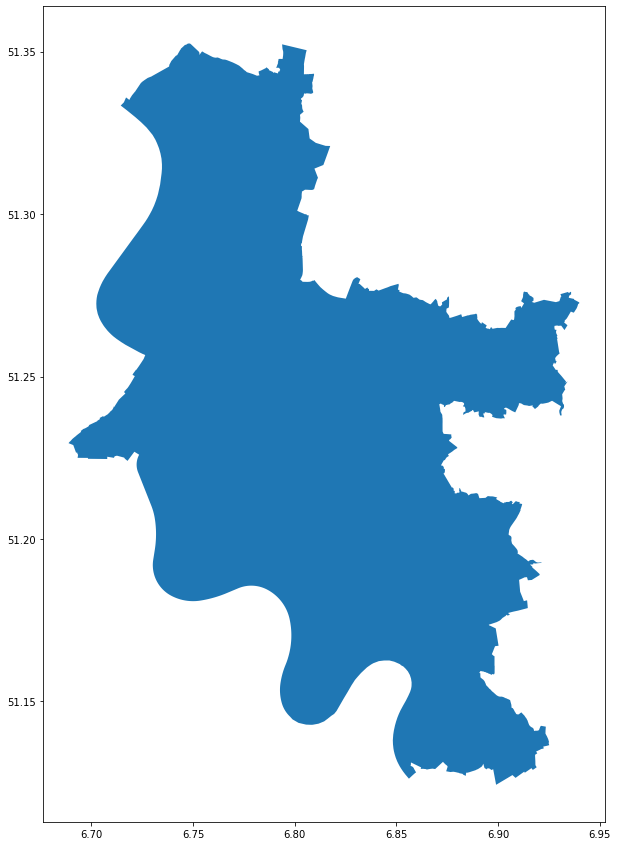

In [147]:
fig, ax = plt.subplots(figsize=(15, 15))
dus_geo.plot(ax=ax)

In [145]:
dus_geo.head()

bbox_north  bbox_south  bbox_east  bbox_west   place_id  osm_type  osm_id  \
0   51.352487   51.124375   6.939885   6.688815  297487281  relation   62539   

         lat       lon                                   display_na     class  \
0  51.225402  6.776314  Dusseldorf, North Rhine-Westphalia, Germany  boundary   

             type  importance  \
0  administrative    0.672609   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [119]:
pd.DataFrame(dus_geo['geometry'])

geometry
0  POLYGON ((6.68881 51.22949, 6.68886 51.22952, 6.68889 51.22953, 6.68889 51.22953, 6.68890 51.22954, 6.68891 51.22954, 6.68893 51.22957, 6.68897 51.22959, 6.68906 51.22967, 6.68907 51.22967, 6.68908 51.22968, 6.68909 51.22969, 6.68927 51.22983, 6.68942 51.22995, 6.68958 51.22999, 6.68983 51.23016, 6.68989 51.23020, 6.68994 51.23023, 6.68999 51.23027, 6.68999 51.23027, 6.68999 51.23027, 6.69018 51.23040, 6.69036 51.23053, 6.69037 51.23054, 6.69040 51.23055, 6.69043 51.23058, 6.69049 51.23062, 6.69053 51.23065, 6.69057 51.23068, 6.69059 51.23070, 6.69059 51.23070, 6.69060 51.23071, 6.69068 51.23076, 6.69069 51.23077, 6.69071 51.23078, 6.69080 51.23082, 6.69102 51.23094, 6.69125 51.23107, 6.69147 51.23117, 6.69171 51.23131, 6.69183 51.23137, 6.69186 51.23138, 6.69188 51.23139, 6.69190 51.23140, 6.69197 51.23143, 6.69202 51.23145, 6.69204 51.23145, 6.69205 51.23146, 6.69205 51.23146, 6.69221 51.23155, 6.69222 51.23155, 6.69233 51.23162, 6.69243 51.23167, 6.69246 51.23169, 6.69250 51.23171, 6.69251 51.23172, 6.69253 51.23173, 6.69269 51.23181, 6.69271 51.23183, 6.69272 51.23184, 6.69273 51.23184, 6.69276 51.23186, 6.69302 51.23199, 6.69317 51.23207, 6.69329 51.23213, 6.69338 51.23217, 6.69341 51.23218, 6.69343 51.23219, 6.69345 51.23220, 6.69347 51.23221, 6.69353 51.23224, 6.69356 51.23225, 6.69359 51.23227, 6.69394 51.23244, 6.69405 51.23249, 6.69410 51.23252, 6.69463 51.23277, 6.69470 51.23281, 6.69479 51.23286, 6.69503 51.23301, 6.69493 51.23312, 6.69483 51.23323, 6.69545 51.23352, 6.69550 51.23354, 6.69561 51.23360, 6.69576 51.23368, 6.69607 51.23384, 6.69624 51.23388, 6.69633 51.23390, 6.69666 51.23397, 6.69673 51.23399, 6.69711 51.23410, 6.69716 51.23411, 6.69721 51.23413, 6.69732 51.23416, 6.69743 51.23420, 6.69762 51.23427, 6.69765 51.23429, 6.69778 51.23433, 6.69799 51.23441, 6.69799 51.23441, 6.69858 51.23462, 6.69894 51.23497, 6.69899 51.23501, 6.69899 51.23508, 6.70294 51.23624, 6.70291 51.23636, 6.70313 51.23639, 6.70312 51.23643, 6.70321 51.23647, 6.70434 51.23693, 6.70410 51.23722, 6.70585 51.23783, 6.70613 51.23758, 6.70663 51.23780, 6.70819 51.23842, 6.70842 51.23858, 6.70863 51.23873, 6.70907 51.23896, 6.70916 51.23911, 6.71023 51.23968, 6.71050 51.23992, 6.71095 51.24043, 6.71102 51.24077, 6.71126 51.24061, 6.71127 51.24060, 6.71190 51.24122, 6.71335 51.24265, 6.71357 51.24287, 6.71520 51.24385, 6.71656 51.24464, 6.71678 51.24477, 6.71613 51.24522, 6.71615 51.24524, 6.71646 51.24552, 6.71721 51.24606, 6.71785 51.24647, 6.71801 51.24661, 6.71828 51.24685, 6.71846 51.24702, 6.71948 51.24802, 6.72138 51.25006, 6.72139 51.25012, 6.72109 51.25025, 6.72026 51.25050, 6.72056 51.25080, 6.72054 51.25084, 6.72148 51.25163, 6.72200 51.25208, 6.72211 51.25202, 6.72344 51.25319, 6.72460 51.25428, 6.72575 51.25539, 6.72655 51.25660, 6.72614 51.25672, 6.72508 51.25700, 6.72403 51.25733, 6.72365 51.25744, 6.71952 51.25885, 6.71684 51.25976, 6.71568 51.26022, 6.71473 51.26060, 6.71252 51.26155, 6.71085 51.26235, 6.70980 51.26295, 6.70876 51.26359, 6.70801 51.26409, 6.70709 51.26481, 6.70663 51.26517, 6.70605 51.26567, 6.70521 51.26650, 6.70465 51.26710, 6.70398 51.26796, 6.70339 51.26893, 6.70333 51.26902, 6.70315 51.26938, 6.70280 51.27041, 6.70269 51.27072, 6.70259 51.27117, 6.70249 51.27239, 6.70254 51.27315, 6.70255 51.27329, 6.70270 51.27418, 6.70279 51.27450, 6.70296 51.27507, 6.70336 51.27592, 6.70410 51.27723, 6.70453 51.27786, 6.70463 51.27800, 6.70469 51.27809, 6.70477 51.27820, 6.70481 51.27826, 6.70560 51.27926, 6.70682 51.28057, 6.70795 51.28164, 6.71716 51.28954, 6.71757 51.28989, 6.71783 51.29012, 6.72105 51.29288, 6.72263 51.29422, 6.72545 51.29666, 6.72671 51.29778, 6.72774 51.29880, 6.72884 51.30001, 6.72979 51.30112, 6.73090 51.30263, 6.73185 51.30419, 6.73248 51.30540, 6.73284 51.30620, 6.73386 51.30909, 6.73458 51.31258, 6.73475 51.31394, 6.73475 51.31529, 6.73454 51.31701, 6.73403 51.31862, 6.73330 51.32024, 6.73233 51.32177, 6.73155 51.32285, 6.73014 51.32435, 6.72720 51.32661, 6.72445 51.32829, 

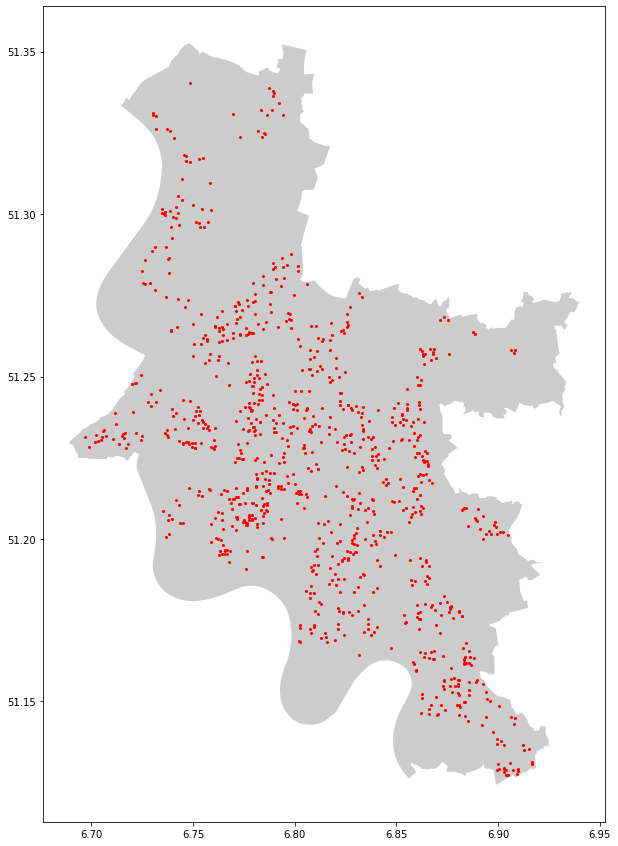

In [149]:
fig, ax = plt.subplots(figsize=(15, 15))
dus_geo.plot(ax=ax, color="grey", alpha=0.4)
noise.plot(ax=ax, markersize=4, color="red", marker="o")
plt.show()

In [154]:
dus_poly = shapely.wkt.loads("POLYGON ((6.68881 51.22949, 6.68886 51.22952, 6.68889 51.22953, 6.68889 51.22953, 6.68890 51.22954, 6.68891 51.22954, 6.68893 51.22957, 6.68897 51.22959, 6.68906 51.22967, 6.68907 51.22967, 6.68908 51.22968, 6.68909 51.22969, 6.68927 51.22983, 6.68942 51.22995, 6.68958 51.22999, 6.68983 51.23016, 6.68989 51.23020, 6.68994 51.23023, 6.68999 51.23027, 6.68999 51.23027, 6.68999 51.23027, 6.69018 51.23040, 6.69036 51.23053, 6.69037 51.23054, 6.69040 51.23055, 6.69043 51.23058, 6.69049 51.23062, 6.69053 51.23065, 6.69057 51.23068, 6.69059 51.23070, 6.69059 51.23070, 6.69060 51.23071, 6.69068 51.23076, 6.69069 51.23077, 6.69071 51.23078, 6.69080 51.23082, 6.69102 51.23094, 6.69125 51.23107, 6.69147 51.23117, 6.69171 51.23131, 6.69183 51.23137, 6.69186 51.23138, 6.69188 51.23139, 6.69190 51.23140, 6.69197 51.23143, 6.69202 51.23145, 6.69204 51.23145, 6.69205 51.23146, 6.69205 51.23146, 6.69221 51.23155, 6.69222 51.23155, 6.69233 51.23162, 6.69243 51.23167, 6.69246 51.23169, 6.69250 51.23171, 6.69251 51.23172, 6.69253 51.23173, 6.69269 51.23181, 6.69271 51.23183, 6.69272 51.23184, 6.69273 51.23184, 6.69276 51.23186, 6.69302 51.23199, 6.69317 51.23207, 6.69329 51.23213, 6.69338 51.23217, 6.69341 51.23218, 6.69343 51.23219, 6.69345 51.23220, 6.69347 51.23221, 6.69353 51.23224, 6.69356 51.23225, 6.69359 51.23227, 6.69394 51.23244, 6.69405 51.23249, 6.69410 51.23252, 6.69463 51.23277, 6.69470 51.23281, 6.69479 51.23286, 6.69503 51.23301, 6.69493 51.23312, 6.69483 51.23323, 6.69545 51.23352, 6.69550 51.23354, 6.69561 51.23360, 6.69576 51.23368, 6.69607 51.23384, 6.69624 51.23388, 6.69633 51.23390, 6.69666 51.23397, 6.69673 51.23399, 6.69711 51.23410, 6.69716 51.23411, 6.69721 51.23413, 6.69732 51.23416, 6.69743 51.23420, 6.69762 51.23427, 6.69765 51.23429, 6.69778 51.23433, 6.69799 51.23441, 6.69799 51.23441, 6.69858 51.23462, 6.69894 51.23497, 6.69899 51.23501, 6.69899 51.23508, 6.70294 51.23624, 6.70291 51.23636, 6.70313 51.23639, 6.70312 51.23643, 6.70321 51.23647, 6.70434 51.23693, 6.70410 51.23722, 6.70585 51.23783, 6.70613 51.23758, 6.70663 51.23780, 6.70819 51.23842, 6.70842 51.23858, 6.70863 51.23873, 6.70907 51.23896, 6.70916 51.23911, 6.71023 51.23968, 6.71050 51.23992, 6.71095 51.24043, 6.71102 51.24077, 6.71126 51.24061, 6.71127 51.24060, 6.71190 51.24122, 6.71335 51.24265, 6.71357 51.24287, 6.71520 51.24385, 6.71656 51.24464, 6.71678 51.24477, 6.71613 51.24522, 6.71615 51.24524, 6.71646 51.24552, 6.71721 51.24606, 6.71785 51.24647, 6.71801 51.24661, 6.71828 51.24685, 6.71846 51.24702, 6.71948 51.24802, 6.72138 51.25006, 6.72139 51.25012, 6.72109 51.25025, 6.72026 51.25050, 6.72056 51.25080, 6.72054 51.25084, 6.72148 51.25163, 6.72200 51.25208, 6.72211 51.25202, 6.72344 51.25319, 6.72460 51.25428, 6.72575 51.25539, 6.72655 51.25660, 6.72614 51.25672, 6.72508 51.25700, 6.72403 51.25733, 6.72365 51.25744, 6.71952 51.25885, 6.71684 51.25976, 6.71568 51.26022, 6.71473 51.26060, 6.71252 51.26155, 6.71085 51.26235, 6.70980 51.26295, 6.70876 51.26359, 6.70801 51.26409, 6.70709 51.26481, 6.70663 51.26517, 6.70605 51.26567, 6.70521 51.26650, 6.70465 51.26710, 6.70398 51.26796, 6.70339 51.26893, 6.70333 51.26902, 6.70315 51.26938, 6.70280 51.27041, 6.70269 51.27072, 6.70259 51.27117, 6.70249 51.27239, 6.70254 51.27315, 6.70255 51.27329, 6.70270 51.27418, 6.70279 51.27450, 6.70296 51.27507, 6.70336 51.27592, 6.70410 51.27723, 6.70453 51.27786, 6.70463 51.27800, 6.70469 51.27809, 6.70477 51.27820, 6.70481 51.27826, 6.70560 51.27926, 6.70682 51.28057, 6.70795 51.28164, 6.71716 51.28954, 6.71757 51.28989, 6.71783 51.29012, 6.72105 51.29288, 6.72263 51.29422, 6.72545 51.29666, 6.72671 51.29778, 6.72774 51.29880, 6.72884 51.30001, 6.72979 51.30112, 6.73090 51.30263, 6.73185 51.30419, 6.73248 51.30540, 6.73284 51.30620, 6.73386 51.30909, 6.73458 51.31258, 6.73475 51.31394, 6.73475 51.31529, 6.73454 51.31701, 6.73403 51.31862, 6.73330 51.32024, 6.73233 51.32177, 6.73155 51.32285, 6.73014 51.32435, 6.72720 51.32661, 6.72445 51.32829, 6.72168 51.32980, 6.71761 51.33187, 6.71449 51.33338, 6.71605 51.33437, 6.71711 51.33588, 6.71783 51.33554, 6.71838 51.33527, 6.71867 51.33512, 6.71876 51.33515, 6.71910 51.33560, 6.71969 51.33618, 6.72005 51.33654, 6.72152 51.33768, 6.72157 51.33768, 6.72166 51.33771, 6.72167 51.33778, 6.72435 51.34028, 6.72506 51.34071, 6.72620 51.34123, 6.72778 51.34189, 6.72946 51.34230, 6.72952 51.34228, 6.72958 51.34231, 6.72960 51.34234, 6.73326 51.34363, 6.73651 51.34477, 6.73663 51.34481, 6.73826 51.34539, 6.73837 51.34586, 6.73834 51.34587, 6.73937 51.34710, 6.74160 51.34871, 6.74223 51.34889, 6.74380 51.35059, 6.74399 51.35066, 6.74401 51.35068, 6.74409 51.35091, 6.74417 51.35096, 6.74428 51.35103, 6.74428 51.35100, 6.74528 51.35158, 6.74551 51.35171, 6.74562 51.35177, 6.74596 51.35199, 6.74654 51.35210, 6.74697 51.35221, 6.74729 51.35240, 6.74788 51.35248, 6.74802 51.35249, 6.74823 51.35248, 6.74838 51.35247, 6.74855 51.35244, 6.74871 51.35239, 6.74885 51.35233, 6.74918 51.35215, 6.75276 51.35003, 6.75285 51.34997, 6.75293 51.34990, 6.75302 51.34981, 6.75307 51.34974, 6.75313 51.34962, 6.75316 51.34954, 6.75317 51.34943, 6.75317 51.34933, 6.75314 51.34900, 6.75330 51.34905, 6.75338 51.34915, 6.75350 51.34923, 6.75372 51.34944, 6.75433 51.34994, 6.75453 51.35000, 6.75462 51.35001, 6.75481 51.34996, 6.75541 51.34970, 6.75565 51.34961, 6.75620 51.34944, 6.75669 51.34929, 6.75726 51.34911, 6.75794 51.34888, 6.75845 51.34870, 6.75873 51.34861, 6.75954 51.34837, 6.75986 51.34827, 6.76001 51.34824, 6.76015 51.34822, 6.76040 51.34819, 6.76089 51.34811, 6.76210 51.34815, 6.76227 51.34819, 6.76229 51.34814, 6.76251 51.34808, 6.76292 51.34799, 6.76375 51.34775, 6.76406 51.34768, 6.76459 51.34757, 6.76482 51.34755, 6.76562 51.34753, 6.76607 51.34747, 6.76688 51.34731, 6.76948 51.34666, 6.77058 51.34634, 6.77160 51.34603, 6.77221 51.34582, 6.77263 51.34569, 6.77314 51.34543, 6.77395 51.34500, 6.77427 51.34485, 6.77505 51.34438, 6.77527 51.34426, 6.77581 51.34403, 6.77602 51.34393, 6.77615 51.34384, 6.77631 51.34374, 6.77640 51.34372, 6.77646 51.34365, 6.77768 51.34342, 6.77933 51.34310, 6.78025 51.34286, 6.78062 51.34277, 6.78124 51.34261, 6.78136 51.34258, 6.78145 51.34256, 6.78150 51.34255, 6.78269 51.34269, 6.78243 51.34313, 6.78225 51.34386, 6.78266 51.34399, 6.78341 51.34416, 6.78579 51.34490, 6.78612 51.34515, 6.78742 51.34447, 6.78728 51.34429, 6.78947 51.34365, 6.78928 51.34353, 6.78957 51.34339, 6.78960 51.34338, 6.78967 51.34350, 6.78976 51.34363, 6.79139 51.34333, 6.79181 51.34326, 6.79187 51.34358, 6.79181 51.34382, 6.79223 51.34380, 6.79228 51.34382, 6.79247 51.34387, 6.79249 51.34390, 6.79254 51.34391, 6.79259 51.34402, 6.79261 51.34413, 6.79274 51.34424, 6.79287 51.34428, 6.79282 51.34446, 6.79274 51.34461, 6.79267 51.34470, 6.79216 51.34501, 6.79077 51.34503, 6.79106 51.34521, 6.79190 51.34660, 6.79169 51.34665, 6.79177 51.34679, 6.79196 51.34724, 6.79204 51.34752, 6.79204 51.34765, 6.79209 51.34768, 6.79217 51.34771, 6.79231 51.34772, 6.79245 51.34773, 6.79300 51.34774, 6.79340 51.34773, 6.79365 51.34771, 6.79381 51.34773, 6.79396 51.34767, 6.79409 51.34784, 6.79432 51.34886, 6.79437 51.34962, 6.79432 51.35008, 6.79424 51.35029, 6.79412 51.35049, 6.79399 51.35091, 6.79390 51.35157, 6.79382 51.35222, 6.80587 51.35041, 6.80589 51.35039, 6.80587 51.35039, 6.80549 51.34952, 6.80536 51.34910, 6.80515 51.34829, 6.80493 51.34764, 6.80458 51.34632, 6.80455 51.34619, 6.80450 51.34614, 6.80449 51.34612, 6.80455 51.34608, 6.80459 51.34532, 6.80452 51.34300, 6.80463 51.34299, 6.80483 51.34301, 6.80512 51.34302, 6.80523 51.34304, 6.80532 51.34302, 6.80554 51.34301, 6.80576 51.34302, 6.80598 51.34302, 6.80616 51.34305, 6.80643 51.34303, 6.80647 51.34304, 6.80655 51.34303, 6.80683 51.34303, 6.80719 51.34306, 6.80723 51.34310, 6.80745 51.34308, 6.80773 51.34308, 6.80786 51.34310, 6.80848 51.34310, 6.80871 51.34313, 6.80894 51.34314, 6.80902 51.34315, 6.80915 51.34317, 6.80940 51.34318, 6.80952 51.34292, 6.80943 51.34251, 6.80936 51.34239, 6.80926 51.34221, 6.80921 51.34188, 6.80875 51.34070, 6.80857 51.34051, 6.80875 51.33952, 6.80877 51.33938, 6.80865 51.33863, 6.80913 51.33745, 6.80905 51.33742, 6.80894 51.33728, 6.80887 51.33723, 6.80864 51.33715, 6.80860 51.33713, 6.80838 51.33707, 6.80799 51.33701, 6.80769 51.33702, 6.80739 51.33706, 6.80733 51.33707, 6.80679 51.33710, 6.80617 51.33714, 6.80610 51.33714, 6.80607 51.33714, 6.80604 51.33714, 6.80591 51.33713, 6.80574 51.33712, 6.80559 51.33712, 6.80529 51.33705, 6.80509 51.33703, 6.80491 51.33705, 6.80474 51.33721, 6.80469 51.33717, 6.80464 51.33706, 6.80458 51.33695, 6.80456 51.33690, 6.80449 51.33675, 6.80443 51.33652, 6.80434 51.33633, 6.80419 51.33615, 6.80399 51.33603, 6.80365 51.33577, 6.80338 51.33569, 6.80320 51.33558, 6.80306 51.33547, 6.80309 51.33534, 6.80321 51.33519, 6.80343 51.33511, 6.80358 51.33504, 6.80356 51.33482, 6.80345 51.33455, 6.80341 51.33441, 6.80328 51.33410, 6.80327 51.33393, 6.80334 51.33383, 6.80343 51.33373, 6.80358 51.33350, 6.80363 51.33334, 6.80367 51.33284, 6.80376 51.33238, 6.80384 51.33222, 6.80393 51.33211, 6.80403 51.33193, 6.80429 51.33163, 6.80434 51.33152, 6.80439 51.33149, 6.80260 51.33054, 6.80274 51.32963, 6.80260 51.32843, 6.80611 51.32650, 6.80674 51.32615, 6.80735 51.32324, 6.80872 51.32263, 6.81028 51.32194, 6.81027 51.32192, 6.81517 51.32098, 6.81746 51.32094, 6.81606 51.31847, 6.81412 51.31514, 6.81398 51.31507, 6.80968 51.31397, 6.80975 51.31390, 6.81144 51.31114, 6.81105 51.31064, 6.81076 51.31012, 6.80998 51.30865, 6.80975 51.30811, 6.80971 51.30801, 6.80952 51.30766, 6.80941 51.30757, 6.80930 51.30757, 6.80911 51.30757, 6.80897 51.30754, 6.80881 51.30744, 6.80867 51.30741, 6.80788 51.30741, 6.80693 51.30744, 6.80622 51.30747, 6.80515 51.30748, 6.80502 51.30748, 6.80440 51.30722, 6.80353 51.30690, 6.80354 51.30667, 6.80354 51.30656, 6.80353 51.30648, 6.80345 51.30631, 6.80341 51.30571, 6.80343 51.30526, 6.80337 51.30507, 6.80337 51.30494, 6.80335 51.30482, 6.80124 51.30100, 6.80144 51.30094, 6.80235 51.30066, 6.80463 51.30005, 6.80477 51.29997, 6.80581 51.29991, 6.80600 51.29965, 6.80695 51.29958, 6.80667 51.29865, 6.80657 51.29830, 6.80586 51.29680, 6.80477 51.29455, 6.80446 51.29389, 6.80408 51.29311, 6.80364 51.29163, 6.80352 51.29098, 6.80319 51.29095, 6.80315 51.29055, 6.80314 51.29017, 6.80354 51.29010, 6.80352 51.28909, 6.80360 51.28858, 6.80362 51.28835, 6.80370 51.28715, 6.80387 51.28706, 6.80380 51.28666, 6.80387 51.28628, 6.80390 51.28579, 6.80392 51.28527, 6.80404 51.28280, 6.80401 51.28236, 6.80391 51.28177, 6.80376 51.28119, 6.80347 51.28078, 6.80343 51.28072, 6.80332 51.28057, 6.80269 51.27978, 6.80294 51.27967, 6.80323 51.27955, 6.80379 51.27932, 6.80366 51.27915, 6.80616 51.27912, 6.80635 51.27912, 6.80724 51.27915, 6.80763 51.27919, 6.80809 51.27927, 6.80846 51.27937, 6.80874 51.27948, 6.80896 51.27949, 6.80911 51.27943, 6.80950 51.27959, 6.80972 51.27969, 6.80988 51.27953, 6.81030 51.27919, 6.81047 51.27906, 6.81054 51.27901, 6.81147 51.27832, 6.81257 51.27753, 6.81391 51.27678, 6.81530 51.27607, 6.81633 51.27558, 6.81728 51.27522, 6.81858 51.27486, 6.81884 51.27478, 6.82099 51.27440, 6.82165 51.27431, 6.82338 51.27413, 6.82511 51.27396, 6.82516 51.27403, 6.82699 51.27704, 6.82744 51.27777, 6.82749 51.27785, 6.82833 51.27921, 6.82843 51.27936, 6.82864 51.27963, 6.82890 51.27987, 6.82900 51.27995, 6.82976 51.28031, 6.83069 51.28058, 6.83146 51.28027, 6.83199 51.28006, 6.83227 51.27995, 6.83134 51.27852, 6.83192 51.27848, 6.83274 51.27802, 6.83286 51.27795, 6.83299 51.27787, 6.83391 51.27735, 6.83425 51.27716, 6.83444 51.27695, 6.83462 51.27696, 6.83487 51.27706, 6.83544 51.27728, 6.83573 51.27738, 6.83579 51.27736, 6.83592 51.27721, 6.83598 51.27708, 6.83599 51.27696, 6.83641 51.27697, 6.83653 51.27697, 6.83652 51.27637, 6.83901 51.27634, 6.84018 51.27682, 6.84124 51.27643, 6.84423 51.27713, 6.84586 51.27749, 6.84706 51.27781, 6.85059 51.27844, 6.85091 51.27854, 6.85121 51.27814, 6.85111 51.27804, 6.85107 51.27782, 6.85073 51.27669, 6.85126 51.27666, 6.85136 51.27664, 6.85143 51.27660, 6.85146 51.27656, 6.85148 51.27649, 6.85139 51.27615, 6.85145 51.27610, 6.85168 51.27605, 6.85325 51.27565, 6.85354 51.27561, 6.85432 51.27558, 6.85494 51.27549, 6.85635 51.27521, 6.85665 51.27510, 6.85746 51.27473, 6.85791 51.27449, 6.85808 51.27437, 6.85825 51.27428, 6.85833 51.27426, 6.85848 51.27423, 6.85863 51.27423, 6.85914 51.27428, 6.85971 51.27436, 6.85994 51.27431, 6.86020 51.27421, 6.86059 51.27402, 6.86117 51.27374, 6.86152 51.27364, 6.86237 51.27355, 6.86267 51.27354, 6.86312 51.27345, 6.86452 51.27287, 6.86609 51.27236, 6.86635 51.27229, 6.86657 51.27223, 6.86686 51.27226, 6.86688 51.27224, 6.86785 51.27292, 6.86807 51.27306, 6.86865 51.27354, 6.86879 51.27361, 6.86928 51.27389, 6.86956 51.27369, 6.86982 51.27343, 6.87008 51.27312, 6.87012 51.27281, 6.87026 51.27249, 6.87035 51.27223, 6.87053 51.27195, 6.87061 51.27173, 6.87115 51.27165, 6.87136 51.27155, 6.87149 51.27159, 6.87159 51.27160, 6.87200 51.27183, 6.87252 51.27218, 6.87235 51.27282, 6.87465 51.27367, 6.87469 51.27365, 6.87482 51.27372, 6.87486 51.27380, 6.87486 51.27402, 6.87490 51.27415, 6.87496 51.27424, 6.87511 51.27435, 6.87534 51.27447, 6.87574 51.27470, 6.87577 51.27454, 6.87585 51.27426, 6.87585 51.27403, 6.87588 51.27381, 6.87591 51.27360, 6.87588 51.27341, 6.87590 51.27282, 6.87585 51.27191, 6.87576 51.27124, 6.87462 51.27088, 6.87454 51.27024, 6.87453 51.27003, 6.87454 51.26989, 6.87458 51.26984, 6.87483 51.26958, 6.87515 51.26931, 6.87580 51.26876, 6.87609 51.26803, 6.87612 51.26800, 6.87719 51.26818, 6.87971 51.26868, 6.87993 51.26873, 6.88183 51.26916, 6.88184 51.26915, 6.88201 51.26889, 6.88215 51.26851, 6.88234 51.26832, 6.88247 51.26833, 6.88381 51.26857, 6.88515 51.26883, 6.88562 51.26883, 6.88624 51.26898, 6.88853 51.26920, 6.88854 51.26918, 6.88914 51.26937, 6.88976 51.26894, 6.88963 51.26874, 6.88969 51.26860, 6.88977 51.26822, 6.88975 51.26810, 6.88977 51.26802, 6.88968 51.26787, 6.88991 51.26751, 6.89083 51.26673, 6.89162 51.26625, 6.89172 51.26617, 6.89205 51.26671, 6.89301 51.26629, 6.89437 51.26574, 6.89407 51.26530, 6.89383 51.26497, 6.89439 51.26483, 6.89459 51.26477, 6.89481 51.26473, 6.89520 51.26473, 6.89575 51.26461, 6.89598 51.26453, 6.89621 51.26494, 6.89644 51.26512, 6.89700 51.26504, 6.89693 51.26477, 6.89712 51.26474, 6.89725 51.26474, 6.89753 51.26476, 6.89753 51.26470, 6.89774 51.26474, 6.89811 51.26479, 6.89953 51.26495, 6.89954 51.26496, 6.90051 51.26493, 6.90179 51.26497, 6.90368 51.26494, 6.90643 51.26755, 6.90676 51.26748, 6.90692 51.26746, 6.90728 51.26739, 6.90760 51.26736, 6.90781 51.26753, 6.90788 51.26767, 6.90804 51.26863, 6.90800 51.26914, 6.90802 51.26966, 6.90798 51.26992, 6.90812 51.27017, 6.90816 51.27021, 6.90836 51.27034, 6.90840 51.27035, 6.90867 51.27068, 6.90863 51.27086, 6.90853 51.27091, 6.90842 51.27103, 6.90849 51.27108, 6.90882 51.27121, 6.90896 51.27133, 6.90909 51.27136, 6.90997 51.27155, 6.91110 51.27166, 6.91123 51.27133, 6.91141 51.27112, 6.91274 51.27251, 6.91129 51.27318, 6.91135 51.27324, 6.91208 51.27421, 6.91223 51.27457, 6.91226 51.27479, 6.91226 51.27498, 6.91228 51.27530, 6.91238 51.27543, 6.91239 51.27575, 6.91263 51.27602, 6.91278 51.27614, 6.91343 51.27602, 6.91399 51.27600, 6.91441 51.27593, 6.91488 51.27536, 6.91530 51.27519, 6.91554 51.27490, 6.91568 51.27483, 6.91608 51.27480, 6.91656 51.27457, 6.91738 51.27418, 6.91739 51.27348, 6.91732 51.27334, 6.91725 51.27326, 6.91715 51.27321, 6.91651 51.27296, 6.91665 51.27292, 6.91775 51.27269, 6.92252 51.27360, 6.92840 51.27288, 6.93011 51.27320, 6.93081 51.27454, 6.93108 51.27461, 6.93060 51.27534, 6.93437 51.27602, 6.93456 51.27583, 6.93468 51.27570, 6.93477 51.27572, 6.93492 51.27574, 6.93540 51.27599, 6.93582 51.27607, 6.93588 51.27581, 6.93580 51.27560, 6.93594 51.27535, 6.93493 51.27487, 6.93469 51.27430, 6.93496 51.27418, 6.93702 51.27391, 6.93724 51.27388, 6.93734 51.27366, 6.93985 51.27281, 6.93987 51.27272, 6.93988 51.27256, 6.93932 51.27228, 6.93894 51.27152, 6.93855 51.27095, 6.93720 51.26965, 6.93655 51.26977, 6.93573 51.26998, 6.93539 51.26962, 6.93529 51.26950, 6.93416 51.26831, 6.93401 51.26815, 6.93367 51.26782, 6.93282 51.26728, 6.93265 51.26716, 6.93282 51.26705, 6.93243 51.26663, 6.93408 51.26577, 6.93260 51.26429, 6.93101 51.26565, 6.92925 51.26559, 6.92925 51.26572, 6.92767 51.26557, 6.92768 51.26514, 6.92760 51.26490, 6.92778 51.26472, 6.92784 51.26455, 6.92778 51.26441, 6.92833 51.26438, 6.92873 51.26434, 6.92855 51.26408, 6.92847 51.26382, 6.92847 51.26364, 6.92849 51.26348, 6.92859 51.26326, 6.92887 51.26287, 6.92915 51.26250, 6.92881 51.26230, 6.92894 51.26210, 6.92908 51.26190, 6.92925 51.26163, 6.92895 51.26162, 6.93000 51.25739, 6.93032 51.25719, 6.92948 51.25670, 6.92875 51.25628, 6.92808 51.25574, 6.92801 51.25537, 6.92798 51.25522, 6.92845 51.25516, 6.92807 51.25495, 6.92873 51.25472, 6.92824 51.25401, 6.92779 51.25394, 6.92749 51.25435, 6.92687 51.25349, 6.92684 51.25336, 6.92721 51.25305, 6.92819 51.25213, 6.92832 51.25205, 6.92920 51.25204, 6.92928 51.25171, 6.92935 51.25140, 6.93103 51.25022, 6.93163 51.24977, 6.93337 51.24843, 6.93310 51.24819, 6.93318 51.24807, 6.93389 51.24841, 6.93408 51.24843, 6.93251 51.24698, 6.93270 51.24653, 6.93297 51.24588, 6.93283 51.24584, 6.93259 51.24572, 6.93147 51.24452, 6.93167 51.24331, 6.93155 51.24264, 6.93145 51.24250, 6.93191 51.24162, 6.93217 51.24147, 6.93235 51.24123, 6.93239 51.24085, 6.93234 51.24057, 6.93219 51.24028, 6.93194 51.24007, 6.93155 51.23991, 6.93137 51.23977, 6.93123 51.23947, 6.93101 51.23908, 6.93122 51.23803, 6.93049 51.23801, 6.93033 51.23834, 6.93009 51.23895, 6.93003 51.23949, 6.93043 51.24011, 6.93074 51.24060, 6.93088 51.24087, 6.92984 51.24125, 6.92679 51.24242, 6.92671 51.24245, 6.92649 51.24253, 6.92465 51.24197, 6.92332 51.24179, 6.92192 51.24163, 6.92107 51.24166, 6.92087 51.24163, 6.92004 51.24114, 6.91963 51.24075, 6.91816 51.24003, 6.91802 51.24003, 6.91749 51.24041, 6.91745 51.24047, 6.91717 51.24058, 6.91686 51.24072, 6.91707 51.24110, 6.91703 51.24110, 6.91671 51.24108, 6.91650 51.24106, 6.91637 51.24105, 6.91617 51.24103, 6.91603 51.24102, 6.91585 51.24099, 6.91526 51.24094, 6.91512 51.24095, 6.91505 51.24095, 6.91499 51.24096, 6.91488 51.24098, 6.91467 51.24102, 6.91456 51.24104, 6.91441 51.24106, 6.91423 51.24108, 6.91346 51.24114, 6.91311 51.24117, 6.91285 51.24120, 6.91273 51.24121, 6.91266 51.24123, 6.91260 51.24124, 6.91250 51.24127, 6.91125 51.24173, 6.91083 51.24177, 6.91041 51.24179, 6.91022 51.24177, 6.91012 51.24124, 6.90984 51.24087, 6.90959 51.24052, 6.90900 51.23974, 6.90874 51.23939, 6.90840 51.23896, 6.90737 51.23925, 6.90704 51.23935, 6.90680 51.23942, 6.90657 51.23950, 6.90635 51.23958, 6.90613 51.23967, 6.90507 51.24007, 6.90422 51.24035, 6.90385 51.24042, 6.90362 51.24041, 6.90303 51.24023, 6.90291 51.23998, 6.90336 51.23988, 6.90383 51.23978, 6.90402 51.23960, 6.90403 51.23904, 6.90404 51.23891, 6.90396 51.23857, 6.90387 51.23823, 6.90354 51.23833, 6.90329 51.23836, 6.90305 51.23832, 6.90253 51.23824, 6.90264 51.23806, 6.90289 51.23770, 6.90313 51.23743, 6.90322 51.23713, 6.90299 51.23711, 6.90277 51.23710, 6.90273 51.23710, 6.90262 51.23720, 6.90219 51.23715, 6.90167 51.23709, 6.90140 51.23705, 6.90119 51.23707, 6.90029 51.23711, 6.89914 51.23717, 6.89807 51.23738, 6.89699 51.23763, 6.89713 51.23787, 6.89725 51.23815, 6.89700 51.23829, 6.89655 51.23857, 6.89574 51.23885, 6.89552 51.23882, 6.89489 51.23881, 6.89456 51.23893, 6.89420 51.23893, 6.89395 51.23897, 6.89383 51.23897, 6.89361 51.23904, 6.89347 51.23911, 6.89346 51.23872, 6.89328 51.23866, 6.89262 51.23860, 6.89322 51.23745, 6.89277 51.23740, 6.89250 51.23744, 6.89156 51.23765, 6.89097 51.23752, 6.89039 51.23825, 6.89047 51.23929, 6.89030 51.23925, 6.89017 51.23923, 6.88976 51.23918, 6.88896 51.23906, 6.88824 51.23896, 6.88815 51.23918, 6.88792 51.23930, 6.88785 51.23945, 6.88782 51.23951, 6.88770 51.23966, 6.88753 51.23971, 6.88739 51.23969, 6.88719 51.23954, 6.88704 51.23942, 6.88669 51.23933, 6.88648 51.23929, 6.88631 51.23918, 6.88603 51.23912, 6.88573 51.23900, 6.88527 51.23881, 6.88468 51.23883, 6.88372 51.23856, 6.88320 51.23834, 6.88302 51.23827, 6.88276 51.23826, 6.88278 51.23846, 6.88310 51.23904, 6.88392 51.23923, 6.88396 51.23955, 6.88391 51.24010, 6.88359 51.24071, 6.88318 51.24073, 6.88279 51.24079, 6.88284 51.24099, 6.88305 51.24119, 6.88324 51.24134, 6.88330 51.24155, 6.88317 51.24179, 6.88299 51.24190, 6.88261 51.24205, 6.88236 51.24212, 6.88181 51.24220, 6.88104 51.24216, 6.87834 51.24251, 6.87757 51.24223, 6.87805 51.24231, 6.87805 51.24222, 6.87659 51.24169, 6.87602 51.24140, 6.87548 51.24138, 6.87443 51.24120, 6.87419 51.24106, 6.87400 51.24083, 6.87384 51.24070, 6.87356 51.24061, 6.87340 51.24061, 6.87331 51.24122, 6.87206 51.24153, 6.87195 51.24170, 6.87107 51.24146, 6.87123 51.24089, 6.87139 51.24033, 6.87145 51.24006, 6.87151 51.23979, 6.87164 51.23914, 6.87243 51.23832, 6.87253 51.23814, 6.87260 51.23744, 6.87264 51.23726, 6.87267 51.23709, 6.87268 51.23697, 6.87268 51.23685, 6.87268 51.23663, 6.87268 51.23645, 6.87269 51.23601, 6.87268 51.23563, 6.87267 51.23548, 6.87268 51.23361, 6.87269 51.23310, 6.87291 51.23274, 6.87314 51.23249, 6.87319 51.23235, 6.87486 51.23229, 6.87697 51.23218, 6.87697 51.23159, 6.87710 51.23150, 6.87713 51.23119, 6.87647 51.23069, 6.87620 51.23064, 6.87579 51.23024, 6.87709 51.22959, 6.87780 51.22924, 6.87789 51.22920, 6.87884 51.22874, 6.87982 51.22826, 6.87972 51.22820, 6.88006 51.22803, 6.87908 51.22766, 6.87839 51.22740, 6.87789 51.22714, 6.87744 51.22691, 6.87663 51.22657, 6.87566 51.22618, 6.87537 51.22607, 6.87576 51.22553, 6.87552 51.22546, 6.87488 51.22520, 6.87461 51.22506, 6.87420 51.22471, 6.87404 51.22451, 6.87383 51.22434, 6.87372 51.22429, 6.87362 51.22425, 6.87330 51.22420, 6.87302 51.22393, 6.87292 51.22380, 6.87243 51.22328, 6.87189 51.22263, 6.87264 51.22257, 6.87335 51.22210, 6.87328 51.22200, 6.87323 51.22189, 6.87324 51.22178, 6.87325 51.22173, 6.87331 51.22168, 6.87345 51.22161, 6.87375 51.22151, 6.87380 51.22148, 6.87384 51.22144, 6.87385 51.22137, 6.87380 51.22126, 6.87381 51.22116, 6.87385 51.22101, 6.87386 51.22088, 6.87383 51.22077, 6.87376 51.22069, 6.87369 51.22063, 6.87368 51.22055, 6.87369 51.22044, 6.87362 51.22031, 6.87324 51.22016, 6.87313 51.21998, 6.87333 51.21998, 6.87422 51.21901, 6.87453 51.21869, 6.87483 51.21838, 6.87484 51.21837, 6.87486 51.21835, 6.87526 51.21792, 6.87554 51.21762, 6.87610 51.21703, 6.87649 51.21662, 6.87688 51.21620, 6.87721 51.21586, 6.87725 51.21582, 6.87769 51.21585, 6.87780 51.21573, 6.87792 51.21561, 6.87804 51.21554, 6.87831 51.21533, 6.87792 51.21508, 6.87869 51.21469, 6.87864 51.21420, 6.87863 51.21414, 6.87863 51.21411, 6.87864 51.21409, 6.87865 51.21407, 6.87867 51.21406, 6.87870 51.21404, 6.87872 51.21404, 6.87876 51.21403, 6.87914 51.21403, 6.87953 51.21403, 6.87956 51.21404, 6.87959 51.21404, 6.87962 51.21405, 6.87965 51.21407, 6.87968 51.21410, 6.87981 51.21423, 6.88028 51.21422, 6.88093 51.21426, 6.88101 51.21457, 6.88082 51.21493, 6.88095 51.21546, 6.88100 51.21568, 6.88118 51.21569, 6.88169 51.21494, 6.88209 51.21451, 6.88242 51.21456, 6.88278 51.21454, 6.88300 51.21443, 6.88339 51.21438, 6.88425 51.21423, 6.88469 51.21404, 6.88510 51.21375, 6.88542 51.21340, 6.88566 51.21350, 6.88601 51.21366, 6.88626 51.21376, 6.88653 51.21387, 6.88662 51.21390, 6.88776 51.21397, 6.88803 51.21399, 6.88819 51.21400, 6.88836 51.21402, 6.88892 51.21408, 6.88909 51.21410, 6.88921 51.21411, 6.88936 51.21410, 6.88948 51.21408, 6.88959 51.21405, 6.88980 51.21397, 6.88999 51.21390, 6.89011 51.21387, 6.89074 51.21262, 6.89076 51.21255, 6.89098 51.21256, 6.89100 51.21256, 6.89379 51.21267, 6.89440 51.21296, 6.89491 51.21320, 6.89544 51.21317, 6.89587 51.21314, 6.89626 51.21312, 6.89646 51.21312, 6.89711 51.21311, 6.89735 51.21310, 6.89748 51.21309, 6.89758 51.21307, 6.89840 51.21295, 6.89897 51.21286, 6.89926 51.21283, 6.89964 51.21276, 6.89922 51.21264, 6.89914 51.21262, 6.89915 51.21222, 6.89954 51.21209, 6.89993 51.21195, 6.90029 51.21182, 6.90086 51.21162, 6.90115 51.21142, 6.90147 51.21135, 6.90177 51.21126, 6.90218 51.21113, 6.90296 51.21097, 6.90282 51.21127, 6.90338 51.21119, 6.90356 51.21126, 6.90375 51.21134, 6.90388 51.21136, 6.90407 51.21139, 6.90416 51.21139, 6.90433 51.21139, 6.90546 51.21140, 6.90561 51.21150, 6.90576 51.21160, 6.90590 51.21164, 6.90611 51.21171, 6.90635 51.21176, 6.90642 51.21178, 6.90717 51.21130, 6.90695 51.21107, 6.90675 51.21081, 6.90676 51.21077, 6.90688 51.21073, 6.90728 51.21076, 6.90853 51.21157, 6.90876 51.21164, 6.90955 51.21144, 6.90970 51.21143, 6.90981 51.21143, 6.91011 51.21139, 6.91060 51.21139, 6.91043 51.21093, 6.91181 51.21076, 6.91167 51.21040, 6.91159 51.21019, 6.91093 51.20895, 6.91106 51.20892, 6.91099 51.20881, 6.91038 51.20797, 6.91027 51.20782, 6.91005 51.20753, 6.90996 51.20749, 6.90930 51.20670, 6.90881 51.20618, 6.90809 51.20554, 6.90646 51.20408, 6.90605 51.20368, 6.90576 51.20330, 6.90557 51.20302, 6.90549 51.20289, 6.90543 51.20276, 6.90538 51.20259, 6.90538 51.20250, 6.90534 51.20233, 6.90522 51.20180, 6.90519 51.20168, 6.90517 51.20160, 6.90514 51.20151, 6.90518 51.20135, 6.90524 51.20123, 6.90534 51.20118, 6.90570 51.20109, 6.90576 51.20107, 6.90589 51.20102, 6.90601 51.20097, 6.90611 51.20092, 6.90620 51.20088, 6.90625 51.20085, 6.90631 51.20081, 6.90635 51.20077, 6.90639 51.20072, 6.90644 51.20066, 6.90649 51.20058, 6.90652 51.20051, 6.90654 51.20045, 6.90655 51.20037, 6.90655 51.20009, 6.90648 51.19970, 6.90650 51.19942, 6.90656 51.19927, 6.90671 51.19884, 6.90674 51.19877, 6.90679 51.19864, 6.90698 51.19845, 6.90803 51.19775, 6.90843 51.19744, 6.90890 51.19709, 6.90920 51.19684, 6.90926 51.19679, 6.90932 51.19673, 6.90933 51.19672, 6.90935 51.19670, 6.90938 51.19666, 6.90943 51.19661, 6.90946 51.19657, 6.90949 51.19652, 6.90951 51.19648, 6.90954 51.19643, 6.90956 51.19639, 6.90957 51.19635, 6.90961 51.19623, 6.90962 51.19617, 6.90963 51.19609, 6.90965 51.19600, 6.90966 51.19593, 6.90966 51.19586, 6.90965 51.19579, 6.90963 51.19573, 6.90960 51.19563, 6.90958 51.19561, 6.90955 51.19559, 6.90953 51.19558, 6.90951 51.19557, 6.90950 51.19557, 6.90948 51.19557, 6.90941 51.19556, 6.90976 51.19543, 6.91019 51.19528, 6.91082 51.19502, 6.91209 51.19449, 6.91224 51.19439, 6.91346 51.19380, 6.91357 51.19381, 6.91407 51.19352, 6.91462 51.19321, 6.91471 51.19316, 6.91481 51.19312, 6.91491 51.19315, 6.91536 51.19334, 6.91571 51.19349, 6.91676 51.19358, 6.91690 51.19359, 6.91715 51.19360, 6.91747 51.19349, 6.91758 51.19345, 6.91787 51.19330, 6.91814 51.19316, 6.91828 51.19309, 6.91835 51.19305, 6.91842 51.19302, 6.91861 51.19294, 6.91878 51.19289, 6.91891 51.19285, 6.91902 51.19283, 6.91910 51.19281, 6.91919 51.19280, 6.91929 51.19278, 6.91940 51.19277, 6.91948 51.19276, 6.91956 51.19275, 6.91966 51.19275, 6.91979 51.19275, 6.91989 51.19275, 6.92006 51.19276, 6.92127 51.19282, 6.92131 51.19266, 6.92034 51.19259, 6.91975 51.19255, 6.91800 51.19244, 6.91796 51.19247, 6.91792 51.19250, 6.91789 51.19252, 6.91764 51.19252, 6.91730 51.19246, 6.91729 51.19246, 6.91714 51.19243, 6.91724 51.19219, 6.91711 51.19219, 6.91667 51.19216, 6.91619 51.19214, 6.91561 51.19211, 6.91574 51.19204, 6.91581 51.19193, 6.91591 51.19200, 6.91616 51.19185, 6.91634 51.19174, 6.91657 51.19159, 6.91684 51.19143, 6.91668 51.19133, 6.91690 51.19119, 6.91717 51.19102, 6.91731 51.19094, 6.91734 51.19092, 6.91740 51.19089, 6.91750 51.19083, 6.91769 51.19074, 6.91801 51.19057, 6.91841 51.19035, 6.91910 51.18996, 6.91972 51.18959, 6.92033 51.18923, 6.92023 51.18919, 6.92053 51.18896, 6.91650 51.18739, 6.91598 51.18736, 6.91553 51.18734, 6.91463 51.18730, 6.91448 51.18760, 6.91438 51.18782, 6.91417 51.18825, 6.91372 51.18823, 6.91338 51.18822, 6.91305 51.18821, 6.91294 51.18817, 6.91220 51.18796, 6.91145 51.18774, 6.91062 51.18751, 6.91027 51.18742, 6.91034 51.18734, 6.91041 51.18731, 6.91028 51.18725, 6.91028 51.18719, 6.91034 51.18716, 6.91046 51.18627, 6.91058 51.18542, 6.91062 51.18513, 6.91065 51.18491, 6.91071 51.18453, 6.91081 51.18377, 6.91103 51.18343, 6.91124 51.18310, 6.91141 51.18284, 6.91158 51.18257, 6.91192 51.18204, 6.91207 51.18180, 6.91220 51.18159, 6.91257 51.18101, 6.91252 51.18098, 6.91254 51.18093, 6.91258 51.18087, 6.91273 51.18092, 6.91275 51.18089, 6.91333 51.18100, 6.91361 51.18103, 6.91404 51.18111, 6.91407 51.18111, 6.91410 51.18111, 6.91413 51.18111, 6.91415 51.18110, 6.91418 51.18110, 6.91421 51.18108, 6.91423 51.18107, 6.91424 51.18105, 6.91425 51.18103, 6.91436 51.18027, 6.91448 51.17950, 6.91457 51.17874, 6.91415 51.17867, 6.91321 51.17852, 6.91207 51.17833, 6.91136 51.17822, 6.91064 51.17810, 6.90977 51.17795, 6.90914 51.17787, 6.90762 51.17766, 6.90734 51.17763, 6.90631 51.17746, 6.90486 51.17723, 6.90578 51.17670, 6.90514 51.17655, 6.90476 51.17646, 6.90465 51.17643, 6.90417 51.17669, 6.90404 51.17659, 6.90386 51.17646, 6.90378 51.17641, 6.90371 51.17636, 6.90352 51.17625, 6.90320 51.17614, 6.90307 51.17610, 6.90280 51.17597, 6.90270 51.17592, 6.90220 51.17573, 6.90197 51.17559, 6.90163 51.17537, 6.90132 51.17517, 6.90098 51.17500, 6.90066 51.17485, 6.90015 51.17469, 6.89994 51.17462, 6.89946 51.17448, 6.89925 51.17441, 6.89826 51.17421, 6.89730 51.17400, 6.89641 51.17382, 6.89557 51.17366, 6.89542 51.17365, 6.89543 51.17359, 6.89549 51.17348, 6.89564 51.17342, 6.89574 51.17338, 6.89583 51.17335, 6.89590 51.17333, 6.89595 51.17332, 6.89602 51.17331, 6.89610 51.17329, 6.89618 51.17327, 6.89641 51.17321, 6.89881 51.17248, 6.89896 51.17192, 6.89917 51.17109, 6.89967 51.16916, 6.89992 51.16822, 6.90003 51.16781, 6.90020 51.16715, 6.89848 51.16700, 6.89784 51.16602, 6.89779 51.16593, 6.89774 51.16583, 6.89731 51.16517, 6.89689 51.16453, 6.89698 51.16450, 6.89763 51.16411, 6.89822 51.16389, 6.89820 51.16113, 6.89821 51.16103, 6.89821 51.16098, 6.89828 51.16098, 6.89825 51.15873, 6.89819 51.15870, 6.89818 51.15868, 6.89819 51.15861, 6.89817 51.15857, 6.89814 51.15852, 6.89809 51.15847, 6.89803 51.15842, 6.89797 51.15838, 6.89775 51.15834, 6.89764 51.15835, 6.89757 51.15836, 6.89731 51.15846, 6.89726 51.15846, 6.89723 51.15845, 6.89719 51.15844, 6.89717 51.15842, 6.89710 51.15837, 6.89681 51.15824, 6.89670 51.15822, 6.89662 51.15821, 6.89642 51.15827, 6.89638 51.15835, 6.89633 51.15835, 6.89620 51.15836, 6.89615 51.15837, 6.89607 51.15844, 6.89602 51.15846, 6.89598 51.15847, 6.89583 51.15846, 6.89575 51.15847, 6.89569 51.15850, 6.89566 51.15851, 6.89563 51.15853, 6.89556 51.15858, 6.89549 51.15859, 6.89531 51.15858, 6.89526 51.15859, 6.89520 51.15860, 6.89513 51.15863, 6.89508 51.15865, 6.89504 51.15867, 6.89500 51.15869, 6.89496 51.15872, 6.89490 51.15877, 6.89488 51.15878, 6.89486 51.15879, 6.89483 51.15879, 6.89475 51.15879, 6.89460 51.15879, 6.89445 51.15883, 6.89440 51.15885, 6.89437 51.15886, 6.89425 51.15888, 6.89418 51.15888, 6.89412 51.15889, 6.89407 51.15890, 6.89401 51.15893, 6.89396 51.15896, 6.89390 51.15899, 6.89376 51.15902, 6.89370 51.15905, 6.89368 51.15909, 6.89349 51.15907, 6.89327 51.15910, 6.89307 51.15910, 6.89291 51.15915, 6.89269 51.15928, 6.89235 51.15925, 6.89210 51.15927, 6.89182 51.15932, 6.89167 51.15938, 6.89167 51.15935, 6.89158 51.15934, 6.89150 51.15933, 6.89140 51.15937, 6.89133 51.15942, 6.89132 51.15942, 6.89127 51.15935, 6.89124 51.15931, 6.89103 51.15911, 6.89076 51.15893, 6.89084 51.15883, 6.89106 51.15868, 6.89125 51.15866, 6.89124 51.15849, 6.89125 51.15833, 6.89126 51.15781, 6.89134 51.15739, 6.89145 51.15731, 6.89215 51.15696, 6.89281 51.15664, 6.89278 51.15663, 6.89319 51.15633, 6.89337 51.15615, 6.89373 51.15564, 6.89386 51.15547, 6.89407 51.15506, 6.89439 51.15481, 6.89454 51.15471, 6.89501 51.15445, 6.89521 51.15429, 6.89535 51.15416, 6.89576 51.15388, 6.89593 51.15383, 6.89633 51.15361, 6.89652 51.15346, 6.89688 51.15322, 6.89705 51.15308, 6.89734 51.15296, 6.89785 51.15269, 6.89812 51.15253, 6.89850 51.15231, 6.89873 51.15221, 6.89889 51.15208, 6.89914 51.15197, 6.89929 51.15189, 6.89981 51.15170, 6.90024 51.15157, 6.90067 51.15151, 6.90117 51.15148, 6.90154 51.15149, 6.90198 51.15146, 6.90245 51.15136, 6.90263 51.15134, 6.90334 51.15111, 6.90353 51.15105, 6.90415 51.15093, 6.90476 51.15073, 6.90493 51.15071, 6.90549 51.15053, 6.90586 51.15044, 6.90644 51.14910, 6.90652 51.14892, 6.90653 51.14863, 6.90654 51.14856, 6.90658 51.14829, 6.90665 51.14805, 6.90668 51.14800, 6.90706 51.14800, 6.90728 51.14785, 6.90731 51.14777, 6.90739 51.14774, 6.90747 51.14771, 6.90749 51.14771, 6.90760 51.14768, 6.90764 51.14765, 6.90763 51.14751, 6.90761 51.14744, 6.90763 51.14741, 6.90775 51.14736, 6.90779 51.14733, 6.90794 51.14715, 6.90804 51.14708, 6.90807 51.14705, 6.90807 51.14699, 6.90811 51.14691, 6.90823 51.14683, 6.90831 51.14674, 6.90837 51.14672, 6.90846 51.14665, 6.90849 51.14653, 6.90860 51.14646, 6.90866 51.14640, 6.90876 51.14628, 6.90887 51.14617, 6.90892 51.14616, 6.90913 51.14608, 6.90969 51.14601, 6.90984 51.14604, 6.90990 51.14603, 6.91011 51.14603, 6.91015 51.14604, 6.91090 51.14643, 6.91113 51.14653, 6.91140 51.14661, 6.91146 51.14660, 6.91156 51.14658, 6.91169 51.14646, 6.91192 51.14627, 6.91213 51.14617, 6.91258 51.14584, 6.91267 51.14581, 6.91273 51.14578, 6.91275 51.14576, 6.91284 51.14569, 6.91314 51.14543, 6.91350 51.14509, 6.91353 51.14506, 6.91355 51.14504, 6.91363 51.14500, 6.91366 51.14497, 6.91371 51.14493, 6.91395 51.14473, 6.91401 51.14464, 6.91419 51.14442, 6.91434 51.14423, 6.91451 51.14406, 6.91459 51.14386, 6.91466 51.14370, 6.91477 51.14356, 6.91487 51.14334, 6.91500 51.14314, 6.91522 51.14281, 6.91545 51.14258, 6.91563 51.14248, 6.91569 51.14244, 6.91580 51.14236, 6.91598 51.14226, 6.91603 51.14223, 6.91631 51.14211, 6.91658 51.14202, 6.91690 51.14192, 6.91709 51.14181, 6.91716 51.14177, 6.91730 51.14168, 6.91748 51.14149, 6.91747 51.14135, 6.91757 51.14123, 6.91760 51.14104, 6.91764 51.14097, 6.91767 51.14096, 6.91770 51.14095, 6.91779 51.14094, 6.91851 51.14101, 6.91870 51.14101, 6.91886 51.14098, 6.91899 51.14099, 6.91920 51.14102, 6.91929 51.14102, 6.91934 51.14102, 6.91946 51.14101, 6.91976 51.14107, 6.91986 51.14111, 6.92010 51.14126, 6.92023 51.14142, 6.92029 51.14153, 6.92033 51.14162, 6.92053 51.14193, 6.92059 51.14205, 6.92076 51.14227, 6.92088 51.14240, 6.92107 51.14251, 6.92342 51.14225, 6.92328 51.14090, 6.92328 51.14060, 6.92327 51.14050, 6.92323 51.14021, 6.92345 51.13988, 6.92399 51.13926, 6.92460 51.13839, 6.92487 51.13782, 6.92506 51.13740, 6.92477 51.13734, 6.92476 51.13729, 6.92512 51.13656, 6.92440 51.13644, 6.92417 51.13639, 6.92218 51.13612, 6.92232 51.13580, 6.92235 51.13565, 6.92235 51.13551, 6.92117 51.13536, 6.92064 51.13518, 6.91865 51.13459, 6.91926 51.13403, 6.91912 51.13400, 6.91882 51.13386, 6.91813 51.13358, 6.91816 51.13344, 6.91816 51.13307, 6.91823 51.13231, 6.91828 51.13167, 6.91831 51.13052, 6.91835 51.13036, 6.91894 51.12975, 6.91704 51.12893, 6.91637 51.12948, 6.91312 51.12807, 6.91281 51.12839, 6.91274 51.12837, 6.91244 51.12823, 6.91141 51.12777, 6.90856 51.12649, 6.90703 51.12735, 6.90066 51.12498, 6.89904 51.12437, 6.89898 51.12439, 6.89864 51.12557, 6.89829 51.12673, 6.89757 51.12911, 6.89762 51.12917, 6.89702 51.12899, 6.89660 51.12888, 6.89657 51.12899, 6.89554 51.12943, 6.89502 51.12941, 6.89475 51.12940, 6.89440 51.12927, 6.89438 51.12908, 6.89328 51.12954, 6.89270 51.13086, 6.89263 51.13075, 6.89257 51.13066, 6.89235 51.13037, 6.89217 51.13018, 6.89210 51.13011, 6.89183 51.12991, 6.88997 51.12915, 6.88973 51.12913, 6.88880 51.12883, 6.88574 51.12821, 6.88482 51.12807, 6.88439 51.12812, 6.88438 51.12806, 6.88426 51.12792, 6.88415 51.12770, 6.88415 51.12754, 6.88416 51.12736, 6.88407 51.12712, 6.88290 51.12745, 6.88247 51.12774, 6.88103 51.12791, 6.88068 51.12802, 6.88047 51.12806, 6.87975 51.12814, 6.87958 51.12819, 6.87816 51.12837, 6.87754 51.12835, 6.87657 51.12828, 6.87445 51.12852, 6.87511 51.12982, 6.87514 51.12995, 6.87510 51.13005, 6.87504 51.13012, 6.87492 51.13021, 6.87477 51.13031, 6.87411 51.13063, 6.87310 51.13126, 6.87291 51.13144, 6.86904 51.12920, 6.86771 51.12933, 6.86636 51.12922, 6.86476 51.12902, 6.86474 51.12917, 6.86320 51.12927, 6.86283 51.12928, 6.86193 51.12924, 6.86214 51.12971, 6.85813 51.13093, 6.85714 51.13123, 6.85709 51.13043, 6.85697 51.13039, 6.85688 51.13036, 6.85710 51.13018, 6.85758 51.13002, 6.85799 51.12989, 6.85860 51.12945, 6.85852 51.12942, 6.85967 51.12815, 6.85924 51.12801, 6.85789 51.12726, 6.85615 51.12624, 6.85433 51.12758, 6.85322 51.12849, 6.85234 51.12931, 6.85157 51.13010, 6.85096 51.13083, 6.85035 51.13160, 6.84963 51.13277, 6.84909 51.13388, 6.84876 51.13473, 6.84853 51.13555, 6.84830 51.13686, 6.84824 51.13806, 6.84844 51.13978, 6.84875 51.14107, 6.84930 51.14264, 6.84984 51.14384, 6.85050 51.14507, 6.85119 51.14616, 6.85196 51.14721, 6.85322 51.14868, 6.85465 51.15025, 6.85582 51.15171, 6.85672 51.15295, 6.85717 51.15382, 6.85738 51.15449, 6.85744 51.15490, 6.85747 51.15586, 6.85718 51.15704, 6.85659 51.15818, 6.85565 51.15925, 6.85452 51.16008, 6.85338 51.16078, 6.85228 51.16114, 6.85176 51.16146, 6.85087 51.16172, 6.84893 51.16224, 6.84654 51.16262, 6.84391 51.16260, 6.84135 51.16241, 6.83864 51.16177, 6.83757 51.16139, 6.83553 51.16049, 6.83261 51.15877, 6.83084 51.15753, 6.82959 51.15660, 6.82883 51.15586, 6.82794 51.15500, 6.82602 51.15292, 6.82415 51.15097, 6.82056 51.14707, 6.81936 51.14615, 6.81809 51.14563, 6.81629 51.14473, 6.81447 51.14387, 6.81172 51.14317, 6.80891 51.14284, 6.80813 51.14282, 6.80559 51.14288, 6.80190 51.14341, 6.79896 51.14448, 6.79773 51.14532, 6.79760 51.14540, 6.79736 51.14555, 6.79728 51.14560, 6.79717 51.14567, 6.79707 51.14574, 6.79704 51.14576, 6.79704 51.14576, 6.79699 51.14579, 6.79694 51.14582, 6.79684 51.14590, 6.79673 51.14597, 6.79670 51.14599, 6.79664 51.14604, 6.79656 51.14609, 6.79644 51.14619, 6.79639 51.14622, 6.79636 51.14625, 6.79627 51.14632, 6.79618 51.14639, 6.79612 51.14644, 6.79608 51.14647, 6.79601 51.14653, 6.79598 51.14655, 6.79592 51.14660, 6.79590 51.14663, 6.79575 51.14675, 6.79566 51.14683, 6.79565 51.14684, 6.79556 51.14693, 6.79548 51.14700, 6.79545 51.14704, 6.79538 51.14710, 6.79533 51.14715, 6.79529 51.14719, 6.79524 51.14725, 6.79515 51.14734, 6.79510 51.14739, 6.79506 51.14743, 6.79505 51.14745, 6.79504 51.14745, 6.79495 51.14756, 6.79487 51.14765, 6.79481 51.14771, 6.79476 51.14778, 6.79466 51.14790, 6.79465 51.14791, 6.79465 51.14791, 6.79460 51.14798, 6.79453 51.14807, 6.79446 51.14816, 6.79444 51.14818, 6.79438 51.14827, 6.79435 51.14831, 6.79412 51.14866, 6.79402 51.14883, 6.79392 51.14901, 6.79380 51.14924, 6.79374 51.14936, 6.79357 51.14971, 6.79343 51.15005, 6.79331 51.15039, 6.79323 51.15063, 6.79317 51.15082, 6.79305 51.15124, 6.79300 51.15145, 6.79295 51.15167, 6.79292 51.15182, 6.79289 51.15199, 6.79287 51.15210, 6.79287 51.15213, 6.79285 51.15223, 6.79279 51.15278, 6.79277 51.15307, 6.79277 51.15323, 6.79276 51.15349, 6.79276 51.15364, 6.79277 51.15389, 6.79278 51.15405, 6.79281 51.15444, 6.79281 51.15449, 6.79286 51.15483, 6.79288 51.15497, 6.79290 51.15511, 6.79296 51.15540, 6.79299 51.15556, 6.79303 51.15573, 6.79308 51.15593, 6.79319 51.15634, 6.79324 51.15651, 6.79329 51.15668, 6.79331 51.15675, 6.79339 51.15699, 6.79350 51.15731, 6.79359 51.15755, 6.79371 51.15787, 6.79385 51.15820, 6.79392 51.15838, 6.79400 51.15856, 6.79412 51.15882, 6.79431 51.15923, 6.79442 51.15944, 6.79457 51.15973, 6.79472 51.16000, 6.79488 51.16027, 6.79509 51.16063, 6.79528 51.16094, 6.79550 51.16127, 6.79566 51.16151, 6.79581 51.16176, 6.79598 51.16203, 6.79612 51.16226, 6.79648 51.16294, 6.79671 51.16340, 6.79695 51.16391, 6.79711 51.16427, 6.79723 51.16458, 6.79736 51.16490, 6.79740 51.16503, 6.79753 51.16537, 6.79764 51.16572, 6.79770 51.16590, 6.79777 51.16616, 6.79782 51.16632, 6.79786 51.16649, 6.79795 51.16684, 6.79801 51.16710, 6.79808 51.16745, 6.79812 51.16766, 6.79823 51.16832, 6.79829 51.16891, 6.79832 51.16917, 6.79834 51.16944, 6.79835 51.16972, 6.79836 51.17024, 6.79836 51.17076, 6.79834 51.17118, 6.79831 51.17161, 6.79826 51.17203, 6.79821 51.17246, 6.79815 51.17286, 6.79807 51.17326, 6.79790 51.17400, 6.79776 51.17452, 6.79751 51.17530, 6.79745 51.17550, 6.79737 51.17570, 6.79721 51.17609, 6.79704 51.17644, 6.79685 51.17680, 6.79676 51.17698, 6.79666 51.17716, 6.79644 51.17751, 6.79621 51.17785, 6.79597 51.17819, 6.79571 51.17853, 6.79543 51.17886, 6.79531 51.17900, 6.79529 51.17902, 6.79509 51.17924, 6.79483 51.17952, 6.79458 51.17976, 6.79429 51.18004, 6.79411 51.18021, 6.79404 51.18027, 6.79381 51.18047, 6.79357 51.18067, 6.79332 51.18087, 6.79306 51.18107, 6.79266 51.18137, 6.79246 51.18151, 6.79231 51.18161, 6.79202 51.18180, 6.79172 51.18199, 6.79142 51.18218, 6.79076 51.18257, 6.79007 51.18293, 6.78993 51.18300, 6.78983 51.18305, 6.78971 51.18312, 6.78960 51.18317, 6.78948 51.18322, 6.78931 51.18330, 6.78913 51.18339, 6.78901 51.18344, 6.78887 51.18350, 6.78876 51.18355, 6.78867 51.18359, 6.78860 51.18362, 6.78854 51.18365, 6.78836 51.18372, 6.78831 51.18374, 6.78808 51.18384, 6.78801 51.18386, 6.78793 51.18390, 6.78757 51.18404, 6.78750 51.18406, 6.78749 51.18407, 6.78748 51.18407, 6.78736 51.18411, 6.78724 51.18416, 6.78680 51.18431, 6.78680 51.18431, 6.78678 51.18432, 6.78641 51.18444, 6.78621 51.18451, 6.78620 51.18451, 6.78614 51.18453, 6.78590 51.18460, 6.78564 51.18468, 6.78539 51.18475, 6.78518 51.18481, 6.78502 51.18485, 6.78486 51.18489, 6.78478 51.18491, 6.78470 51.18493, 6.78438 51.18500, 6.78418 51.18505, 6.78398 51.18509, 6.78388 51.18511, 6.78378 51.18514, 6.78357 51.18518, 6.78337 51.18521, 6.78316 51.18525, 6.78296 51.18529, 6.78276 51.18532, 6.78237 51.18538, 6.78198 51.18543, 6.78159 51.18548, 6.78120 51.18552, 6.78044 51.18558, 6.78025 51.18559, 6.78005 51.18560, 6.77966 51.18562, 6.77936 51.18563, 6.77906 51.18564, 6.77876 51.18564, 6.77845 51.18564, 6.77820 51.18563, 6.77779 51.18562, 6.77737 51.18561, 6.77712 51.18559, 6.77674 51.18557, 6.77636 51.18554, 6.77609 51.18551, 6.77582 51.18549, 6.77560 51.18546, 6.77539 51.18543, 6.77506 51.18539, 6.77476 51.18535, 6.77461 51.18532, 6.77444 51.18530, 6.77426 51.18527, 6.77401 51.18522, 6.77383 51.18519, 6.77363 51.18515, 6.77343 51.18511, 6.77328 51.18508, 6.77297 51.18501, 6.77278 51.18497, 6.77252 51.18490, 6.77163 51.18467, 6.77065 51.18441, 6.76755 51.18360, 6.76688 51.18342, 6.76580 51.18315, 6.76544 51.18306, 6.76516 51.18299, 6.76474 51.18289, 6.76382 51.18268, 6.76333 51.18257, 6.76273 51.18244, 6.76209 51.18231, 6.76169 51.18223, 6.76138 51.18217, 6.76099 51.18209, 6.76063 51.18203, 6.76025 51.18196, 6.75922 51.18178, 6.75896 51.18174, 6.75871 51.18170, 6.75841 51.18165, 6.75810 51.18160, 6.75769 51.18154, 6.75728 51.18148, 6.75696 51.18144, 6.75665 51.18140, 6.75625 51.18134, 6.75571 51.18128, 6.75542 51.18124, 6.75488 51.18118, 6.75434 51.18112, 6.75416 51.18110, 6.75404 51.18108, 6.75377 51.18106, 6.75332 51.18101, 6.75288 51.18098, 6.75246 51.18095, 6.75222 51.18093, 6.75186 51.18091, 6.75141 51.18089, 6.75121 51.18089, 6.75095 51.18088, 6.75080 51.18088, 6.75048 51.18087, 6.75007 51.18087, 6.74965 51.18087, 6.74936 51.18088, 6.74872 51.18089, 6.74831 51.18091, 6.74796 51.18093, 6.74778 51.18094, 6.74748 51.18096, 6.74717 51.18098, 6.74684 51.18101, 6.74631 51.18106, 6.74588 51.18111, 6.74559 51.18114, 6.74529 51.18118, 6.74487 51.18124, 6.74461 51.18128, 6.74440 51.18131, 6.74425 51.18134, 6.74410 51.18136, 6.74380 51.18142, 6.74360 51.18145, 6.74320 51.18153, 6.74297 51.18157, 6.74273 51.18162, 6.74226 51.18172, 6.74222 51.18173, 6.74218 51.18174, 6.74217 51.18175, 6.74197 51.18179, 6.74177 51.18184, 6.74157 51.18189, 6.74132 51.18195, 6.74106 51.18202, 6.74080 51.18209, 6.74058 51.18215, 6.74034 51.18222, 6.74001 51.18232, 6.73988 51.18236, 6.73969 51.18242, 6.73950 51.18248, 6.73913 51.18260, 6.73851 51.18282, 6.73841 51.18286, 6.73826 51.18292, 6.73810 51.18298, 6.73798 51.18303, 6.73773 51.18314, 6.73761 51.18318, 6.73747 51.18325, 6.73732 51.18332, 6.73722 51.18336, 6.73693 51.18349, 6.73674 51.18359, 6.73664 51.18364, 6.73638 51.18377, 6.73626 51.18383, 6.73603 51.18396, 6.73578 51.18410, 6.73556 51.18423, 6.73543 51.18431, 6.73530 51.18439, 6.73515 51.18448, 6.73499 51.18459, 6.73479 51.18472, 6.73460 51.18485, 6.73450 51.18492, 6.73441 51.18498, 6.73432 51.18505, 6.73422 51.18512, 6.73394 51.18534, 6.73375 51.18549, 6.73357 51.18564, 6.73338 51.18580, 6.73326 51.18591, 6.73315 51.18602, 6.73294 51.18622, 6.73284 51.18631, 6.73274 51.18641, 6.73242 51.18676, 6.73211 51.18712, 6.73185 51.18746, 6.73160 51.18781, 6.73138 51.18816, 6.73129 51.18831, 6.73124 51.18840, 6.73119 51.18849, 6.73117 51.18852, 6.73113 51.18860, 6.73097 51.18890, 6.73080 51.18930, 6.73065 51.18968, 6.73053 51.19007, 6.73046 51.19033, 6.73040 51.19059, 6.73034 51.19089, 6.73030 51.19120, 6.73028 51.19149, 6.73026 51.19191, 6.73026 51.19219, 6.73029 51.19259, 6.73030 51.19267, 6.73034 51.19302, 6.73039 51.19326, 6.73046 51.19359, 6.73067 51.19444, 6.73074 51.19472, 6.73104 51.19589, 6.73109 51.19609, 6.73114 51.19630, 6.73123 51.19666, 6.73128 51.19684, 6.73132 51.19702, 6.73137 51.19724, 6.73149 51.19779, 6.73155 51.19813, 6.73162 51.19856, 6.73166 51.19883, 6.73167 51.19897, 6.73174 51.19952, 6.73178 51.19996, 6.73181 51.20034, 6.73182 51.20057, 6.73183 51.20076, 6.73184 51.20133, 6.73185 51.20138, 6.73185 51.20163, 6.73184 51.20211, 6.73183 51.20225, 6.73182 51.20250, 6.73179 51.20301, 6.73178 51.20307, 6.73177 51.20325, 6.73175 51.20340, 6.73174 51.20352, 6.73173 51.20363, 6.73170 51.20385, 6.73168 51.20407, 6.73163 51.20441, 6.73156 51.20481, 6.73153 51.20501, 6.73149 51.20521, 6.73134 51.20592, 6.73123 51.20636, 6.73117 51.20658, 6.73110 51.20681, 6.73103 51.20704, 6.73096 51.20727, 6.73078 51.20776, 6.73052 51.20838, 6.73042 51.20860, 6.73025 51.20895, 6.73014 51.20916, 6.72997 51.20949, 6.72977 51.20983, 6.72957 51.21017, 6.72805 51.21257, 6.72653 51.21498, 6.72648 51.21505, 6.72590 51.21596, 6.72564 51.21638, 6.72539 51.21677, 6.72539 51.21678, 6.72533 51.21688, 6.72529 51.21694, 6.72423 51.21861, 6.72367 51.21949, 6.72318 51.22027, 6.72295 51.22063, 6.72294 51.22065, 6.72286 51.22078, 6.72276 51.22098, 6.72268 51.22116, 6.72256 51.22144, 6.72247 51.22171, 6.72241 51.22197, 6.72236 51.22222, 6.72234 51.22230, 6.72234 51.22235, 6.72233 51.22244, 6.72231 51.22267, 6.72230 51.22299, 6.72231 51.22316, 6.72233 51.22330, 6.72235 51.22347, 6.72236 51.22357, 6.72242 51.22384, 6.72246 51.22400, 6.72251 51.22417, 6.72253 51.22423, 6.72260 51.22442, 6.72264 51.22451, 6.72267 51.22458, 6.72271 51.22466, 6.72278 51.22481, 6.72285 51.22493, 6.72291 51.22505, 6.72301 51.22522, 6.72307 51.22531, 6.72317 51.22545, 6.72321 51.22551, 6.72323 51.22553, 6.72325 51.22556, 6.72330 51.22564, 6.72335 51.22569, 6.72337 51.22572, 6.72339 51.22575, 6.72342 51.22578, 6.72344 51.22581, 6.72347 51.22584, 6.72350 51.22587, 6.72352 51.22591, 6.72355 51.22594, 6.72323 51.22606, 6.72306 51.22613, 6.72167 51.22667, 6.72167 51.22667, 6.72159 51.22670, 6.72129 51.22682, 6.72120 51.22685, 6.72119 51.22685, 6.71783 51.22403, 6.71728 51.22432, 6.71726 51.22433, 6.71634 51.22480, 6.71645 51.22488, 6.71641 51.22491, 6.71631 51.22493, 6.71627 51.22494, 6.71623 51.22496, 6.71622 51.22504, 6.71613 51.22505, 6.71608 51.22506, 6.71552 51.22515, 6.71406 51.22539, 6.71264 51.22563, 6.71154 51.22546, 6.71138 51.22528, 6.71113 51.22497, 6.70938 51.22516, 6.70938 51.22515, 6.70787 51.22531, 6.70786 51.22496, 6.70785 51.22461, 6.70764 51.22462, 6.70684 51.22462, 6.70569 51.22463, 6.70514 51.22463, 6.70371 51.22464, 6.70353 51.22464, 6.70343 51.22464, 6.70283 51.22465, 6.70240 51.22465, 6.70185 51.22465, 6.70155 51.22466, 6.70122 51.22466, 6.70119 51.22466, 6.70111 51.22466, 6.70100 51.22466, 6.70074 51.22466, 6.70057 51.22466, 6.69844 51.22468, 6.69838 51.22468, 6.69838 51.22495, 6.69815 51.22496, 6.69679 51.22496, 6.69532 51.22497, 6.69329 51.22497, 6.69330 51.22502, 6.69331 51.22506, 6.69334 51.22516, 6.69337 51.22526, 6.69344 51.22551, 6.69346 51.22560, 6.69348 51.22567, 6.69348 51.22573, 6.69348 51.22584, 6.69348 51.22586, 6.69347 51.22588, 6.69346 51.22592, 6.69346 51.22594, 6.69345 51.22597, 6.69344 51.22598, 6.69343 51.22600, 6.69339 51.22607, 6.69338 51.22609, 6.69333 51.22615, 6.69327 51.22623, 6.69309 51.22641, 6.69308 51.22643, 6.69307 51.22644, 6.69307 51.22646, 6.69308 51.22648, 6.69310 51.22650, 6.69312 51.22652, 6.69315 51.22653, 6.69312 51.22655, 6.69304 51.22664, 6.69301 51.22667, 6.69289 51.22663, 6.69256 51.22650, 6.69244 51.22671, 6.69137 51.22854, 6.69116 51.22890, 6.69082 51.22899, 6.69065 51.22903, 6.69031 51.22912, 6.68993 51.22921, 6.68984 51.22924, 6.68981 51.22924, 6.68978 51.22925, 6.68930 51.22937, 6.68881 51.22949))")

In [167]:
m = gpd.GeoDataFrame(geometry=[dus_poly], crs="epsg:4326").explore(name="Dusseldorf", height=300, width=500)

In [168]:
folium.LayerControl().add_to(m)

In [169]:
m

In [ ]:
#next step is to add more layers; labels, heatmap etc